In [1]:
def check_float(textin):
    try:
        float(textin)
        return True

    except ValueError:
        return False
    
def retrieve_lift(folder):
    import os
    import shutil
    import numpy as np
    
    files = os.listdir(folder)
    cleaned = [x for x in files if check_float(x)]
    files = sorted(cleaned)
    
    force_command = "rhoSimpleFoam -postProcess -case {} -func forces".format(folder)
    os.system(force_command)
    
    forces = np.zeros(3)
    moments = np.zeros(3)
    time = np.array([])
    
    for file in files:    
        with open("{}/postProcessing/forces/{}/forces.dat".format(folder,file)) as f:
            full = f.readlines()
            line = full[3]
            starts = []
            ends = []
            for i in range(len(line)):
                if line[i] == '(' and line[i+1] != '(':
                    starts.append(i+1)
                elif line[i] == ')' and line[i-1] != ')':
                    ends.append(i)
            pressure_forces = np.array([float(x) for x in line[starts[0]:ends[0]].split()])
            viscous_forces = np.array([float(x) for x in line[starts[1]:ends[1]].split()])

            pressure_moments = np.array([float(x) for x in line[starts[2]:ends[2]].split()])
            viscous_moments = np.array([float(x) for x in line[starts[3]:ends[3]].split()])
            forces = np.vstack([forces, pressure_forces + viscous_forces])
            moments = np.vstack([moments, pressure_moments + viscous_moments])
            time = np.append(time,float(file))
    return forces, moments, time
        
        
        




In [4]:
import os
import numpy as np
import matplotlib.pyplot as plt

directory = '/media/james/Elements/afc_unsteady/'
cases = ['64a_osc']

forces_bl, moments_bl, time_bl = retrieve_lift(directory+cases[0])
# forces_up, moments_up, time_up = retrieve_lift(directory+cases[1])
# forces_down, moments_down, time_down = retrieve_lift(directory+cases[2])
# forces_osc, moments_osc, time_osc = retrieve_lift(directory+cases[3])


/*---------------------------------------------------------------------------*\
  =========                 |
  \\      /  F ield         | OpenFOAM: The Open Source CFD Toolbox
   \\    /   O peration     | Website:  https://openfoam.org
    \\  /    A nd           | Version:  10
     \\/     M anipulation  |
\*---------------------------------------------------------------------------*/
Build  : 10-b2f0c22c5002
Exec   : rhoSimpleFoam -postProcess -case /media/james/Elements/afc_unsteady/64a_osc -func forces
Date   : Sep 08 2022
Time   : 17:08:22
Host   : "james-xps"
PID    : 17561
I/O    : uncollated
Case   : /media/james/Elements/afc_unsteady/64a_osc
nProcs : 1
sigFpe : Enabling floating point exception trapping (FOAM_SIGFPE).
fileModificationChecking : Monitoring run-time modified files using timeStampMaster (fileModificationSkew 10)
allowSystemOperations : Allowing user-supplied system call operations

// * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * //

No MRF models present

--> FOAM Warning : Creating fvModels from "system/fvOptions" rather than constant/fvModels
No fvModels present
--> FOAM Warning : Creating fvConstraints from "system/fvOptions"

Selecting finite volume constraint type limitTemperature
    Name: limitT
    - selecting all cells
    - selected 27200 cell(s) with volume 4.41472
forces forces:
    Not including porosity effects
forces forces write:
    sum of forces:
        pressure : (8.87719 0.0453406 -2.23204e-17)
        viscous  : (0.459741 -0.000630895 9.28204e-21)
        porous   : (0 0 0)
    sum of moments:
        pressure : (-1.64267e-18 -2.3936e-18 -0.000460924)
        viscous  : (7.27835e-22 7.70319e-22 -4.58459e-06)
        porous   : (0 0 0)


Time = 0.001s
Reading thermophysical properties

Selecting thermodynamics package 
{
    type            hePsiThermo;
    mixture         pureMixture;
    transport       const;
    thermo          hConst;
    equationOfState perfectGas;
    specie          sp

Time = 0.0035s
Reading thermophysical properties

Selecting thermodynamics package 
{
    type            hePsiThermo;
    mixture         pureMixture;
    transport       const;
    thermo          hConst;
    equationOfState perfectGas;
    specie          specie;
    energy          sensibleInternalEnergy;
}

Reading field U

Reading/calculating face flux field phi

Creating turbulence model

Selecting turbulence model type RAS
Selecting RAS turbulence model SpalartAllmaras
Selecting patchDistMethod meshWave
RAS
{
    model           SpalartAllmaras;
    turbulence      on;
    printCoeffs     on;
    sigmaNut        0.66666;
    kappa           0.41;
    Cb1             0.1355;
    Cb2             0.622;
    Cw2             0.3;
    Cw3             2;
    Cv1             7.1;
    Cs              0.3;
}

Creating thermophysical transport model

Selecting thermophysical transport type RAS
Selecting default RAS thermophysical transport model unityLewisEddyDiffusivity
No MRF models pre

Reading field U

Reading/calculating face flux field phi

Creating turbulence model

Selecting turbulence model type RAS
Selecting RAS turbulence model SpalartAllmaras
Selecting patchDistMethod meshWave
RAS
{
    model           SpalartAllmaras;
    turbulence      on;
    printCoeffs     on;
    sigmaNut        0.66666;
    kappa           0.41;
    Cb1             0.1355;
    Cb2             0.622;
    Cw2             0.3;
    Cw3             2;
    Cv1             7.1;
    Cs              0.3;
}

Creating thermophysical transport model

Selecting thermophysical transport type RAS
Selecting default RAS thermophysical transport model unityLewisEddyDiffusivity
No MRF models present

--> FOAM Warning : Creating fvModels from "system/fvOptions" rather than constant/fvModels
No fvModels present
--> FOAM Warning : Creating fvConstraints from "system/fvOptions"

Selecting finite volume constraint type limitTemperature
    Name: limitT
    - selecting all cells
    - selected 27200 cell(s) w

Reading thermophysical properties

Selecting thermodynamics package 
{
    type            hePsiThermo;
    mixture         pureMixture;
    transport       const;
    thermo          hConst;
    equationOfState perfectGas;
    specie          specie;
    energy          sensibleInternalEnergy;
}

Reading field U

Reading/calculating face flux field phi

Creating turbulence model

Selecting turbulence model type RAS
Selecting RAS turbulence model SpalartAllmaras
Selecting patchDistMethod meshWave
RAS
{
    model           SpalartAllmaras;
    turbulence      on;
    printCoeffs     on;
    sigmaNut        0.66666;
    kappa           0.41;
    Cb1             0.1355;
    Cb2             0.622;
    Cw2             0.3;
    Cw3             2;
    Cv1             7.1;
    Cs              0.3;
}

Creating thermophysical transport model

Selecting thermophysical transport type RAS
Selecting default RAS thermophysical transport model unityLewisEddyDiffusivity
No MRF models present

--> FOAM 

Reading field U

Reading/calculating face flux field phi

Creating turbulence model

Selecting turbulence model type RAS
Selecting RAS turbulence model SpalartAllmaras
Selecting patchDistMethod meshWave
RAS
{
    model           SpalartAllmaras;
    turbulence      on;
    printCoeffs     on;
    sigmaNut        0.66666;
    kappa           0.41;
    Cb1             0.1355;
    Cb2             0.622;
    Cw2             0.3;
    Cw3             2;
    Cv1             7.1;
    Cs              0.3;
}

Creating thermophysical transport model

Selecting thermophysical transport type RAS
Selecting default RAS thermophysical transport model unityLewisEddyDiffusivity
No MRF models present

--> FOAM Warning : Creating fvModels from "system/fvOptions" rather than constant/fvModels
No fvModels present
--> FOAM Warning : Creating fvConstraints from "system/fvOptions"

Selecting finite volume constraint type limitTemperature
    Name: limitT
    - selecting all cells
    - selected 27200 cell(s) w

Reading thermophysical properties

Selecting thermodynamics package 
{
    type            hePsiThermo;
    mixture         pureMixture;
    transport       const;
    thermo          hConst;
    equationOfState perfectGas;
    specie          specie;
    energy          sensibleInternalEnergy;
}

Reading field U

Reading/calculating face flux field phi

Creating turbulence model

Selecting turbulence model type RAS
Selecting RAS turbulence model SpalartAllmaras
Selecting patchDistMethod meshWave
RAS
{
    model           SpalartAllmaras;
    turbulence      on;
    printCoeffs     on;
    sigmaNut        0.66666;
    kappa           0.41;
    Cb1             0.1355;
    Cb2             0.622;
    Cw2             0.3;
    Cw3             2;
    Cv1             7.1;
    Cs              0.3;
}

Creating thermophysical transport model

Selecting thermophysical transport type RAS
Selecting default RAS thermophysical transport model unityLewisEddyDiffusivity
No MRF models present

--> FOAM 

Reading thermophysical properties

Selecting thermodynamics package 
{
    type            hePsiThermo;
    mixture         pureMixture;
    transport       const;
    thermo          hConst;
    equationOfState perfectGas;
    specie          specie;
    energy          sensibleInternalEnergy;
}

Reading field U

Reading/calculating face flux field phi

Creating turbulence model

Selecting turbulence model type RAS
Selecting RAS turbulence model SpalartAllmaras
Selecting patchDistMethod meshWave
RAS
{
    model           SpalartAllmaras;
    turbulence      on;
    printCoeffs     on;
    sigmaNut        0.66666;
    kappa           0.41;
    Cb1             0.1355;
    Cb2             0.622;
    Cw2             0.3;
    Cw3             2;
    Cv1             7.1;
    Cs              0.3;
}

Creating thermophysical transport model

Selecting thermophysical transport type RAS
Selecting default RAS thermophysical transport model unityLewisEddyDiffusivity
No MRF models present

--> FOAM 

Reading field U

Reading/calculating face flux field phi

Creating turbulence model

Selecting turbulence model type RAS
Selecting RAS turbulence model SpalartAllmaras
Selecting patchDistMethod meshWave
RAS
{
    model           SpalartAllmaras;
    turbulence      on;
    printCoeffs     on;
    sigmaNut        0.66666;
    kappa           0.41;
    Cb1             0.1355;
    Cb2             0.622;
    Cw2             0.3;
    Cw3             2;
    Cv1             7.1;
    Cs              0.3;
}

Creating thermophysical transport model

Selecting thermophysical transport type RAS
Selecting default RAS thermophysical transport model unityLewisEddyDiffusivity
No MRF models present

--> FOAM Warning : Creating fvModels from "system/fvOptions" rather than constant/fvModels
No fvModels present
--> FOAM Warning : Creating fvConstraints from "system/fvOptions"

Selecting finite volume constraint type limitTemperature
    Name: limitT
    - selecting all cells
    - selected 27200 cell(s) w

Time = 0.021s
Reading thermophysical properties

Selecting thermodynamics package 
{
    type            hePsiThermo;
    mixture         pureMixture;
    transport       const;
    thermo          hConst;
    equationOfState perfectGas;
    specie          specie;
    energy          sensibleInternalEnergy;
}

Reading field U

Reading/calculating face flux field phi

Creating turbulence model

Selecting turbulence model type RAS
Selecting RAS turbulence model SpalartAllmaras
Selecting patchDistMethod meshWave
RAS
{
    model           SpalartAllmaras;
    turbulence      on;
    printCoeffs     on;
    sigmaNut        0.66666;
    kappa           0.41;
    Cb1             0.1355;
    Cb2             0.622;
    Cw2             0.3;
    Cw3             2;
    Cv1             7.1;
    Cs              0.3;
}

Creating thermophysical transport model

Selecting thermophysical transport type RAS
Selecting default RAS thermophysical transport model unityLewisEddyDiffusivity
No MRF models pres

Reading thermophysical properties

Selecting thermodynamics package 
{
    type            hePsiThermo;
    mixture         pureMixture;
    transport       const;
    thermo          hConst;
    equationOfState perfectGas;
    specie          specie;
    energy          sensibleInternalEnergy;
}

Reading field U

Reading/calculating face flux field phi

Creating turbulence model

Selecting turbulence model type RAS
Selecting RAS turbulence model SpalartAllmaras
Selecting patchDistMethod meshWave
RAS
{
    model           SpalartAllmaras;
    turbulence      on;
    printCoeffs     on;
    sigmaNut        0.66666;
    kappa           0.41;
    Cb1             0.1355;
    Cb2             0.622;
    Cw2             0.3;
    Cw3             2;
    Cv1             7.1;
    Cs              0.3;
}

Creating thermophysical transport model

Selecting thermophysical transport type RAS
Selecting default RAS thermophysical transport model unityLewisEddyDiffusivity
No MRF models present

--> FOAM 

Reading thermophysical properties

Selecting thermodynamics package 
{
    type            hePsiThermo;
    mixture         pureMixture;
    transport       const;
    thermo          hConst;
    equationOfState perfectGas;
    specie          specie;
    energy          sensibleInternalEnergy;
}

Reading field U

Reading/calculating face flux field phi

Creating turbulence model

Selecting turbulence model type RAS
Selecting RAS turbulence model SpalartAllmaras
Selecting patchDistMethod meshWave
RAS
{
    model           SpalartAllmaras;
    turbulence      on;
    printCoeffs     on;
    sigmaNut        0.66666;
    kappa           0.41;
    Cb1             0.1355;
    Cb2             0.622;
    Cw2             0.3;
    Cw3             2;
    Cv1             7.1;
    Cs              0.3;
}

Creating thermophysical transport model

Selecting thermophysical transport type RAS
Selecting default RAS thermophysical transport model unityLewisEddyDiffusivity
No MRF models present

--> FOAM 

Reading field U

Reading/calculating face flux field phi

Creating turbulence model

Selecting turbulence model type RAS
Selecting RAS turbulence model SpalartAllmaras
Selecting patchDistMethod meshWave
RAS
{
    model           SpalartAllmaras;
    turbulence      on;
    printCoeffs     on;
    sigmaNut        0.66666;
    kappa           0.41;
    Cb1             0.1355;
    Cb2             0.622;
    Cw2             0.3;
    Cw3             2;
    Cv1             7.1;
    Cs              0.3;
}

Creating thermophysical transport model

Selecting thermophysical transport type RAS
Selecting default RAS thermophysical transport model unityLewisEddyDiffusivity
No MRF models present

--> FOAM Warning : Creating fvModels from "system/fvOptions" rather than constant/fvModels
No fvModels present
--> FOAM Warning : Creating fvConstraints from "system/fvOptions"

Selecting finite volume constraint type limitTemperature
    Name: limitT
    - selecting all cells
    - selected 27200 cell(s) w

Reading thermophysical properties

Selecting thermodynamics package 
{
    type            hePsiThermo;
    mixture         pureMixture;
    transport       const;
    thermo          hConst;
    equationOfState perfectGas;
    specie          specie;
    energy          sensibleInternalEnergy;
}

Reading field U

Reading/calculating face flux field phi

Creating turbulence model

Selecting turbulence model type RAS
Selecting RAS turbulence model SpalartAllmaras
Selecting patchDistMethod meshWave
RAS
{
    model           SpalartAllmaras;
    turbulence      on;
    printCoeffs     on;
    sigmaNut        0.66666;
    kappa           0.41;
    Cb1             0.1355;
    Cb2             0.622;
    Cw2             0.3;
    Cw3             2;
    Cv1             7.1;
    Cs              0.3;
}

Creating thermophysical transport model

Selecting thermophysical transport type RAS
Selecting default RAS thermophysical transport model unityLewisEddyDiffusivity
No MRF models present

--> FOAM 

Reading field U

Reading/calculating face flux field phi

Creating turbulence model

Selecting turbulence model type RAS
Selecting RAS turbulence model SpalartAllmaras
Selecting patchDistMethod meshWave
RAS
{
    model           SpalartAllmaras;
    turbulence      on;
    printCoeffs     on;
    sigmaNut        0.66666;
    kappa           0.41;
    Cb1             0.1355;
    Cb2             0.622;
    Cw2             0.3;
    Cw3             2;
    Cv1             7.1;
    Cs              0.3;
}

Creating thermophysical transport model

Selecting thermophysical transport type RAS
Selecting default RAS thermophysical transport model unityLewisEddyDiffusivity
No MRF models present

--> FOAM Warning : Creating fvModels from "system/fvOptions" rather than constant/fvModels
No fvModels present
--> FOAM Warning : Creating fvConstraints from "system/fvOptions"

Selecting finite volume constraint type limitTemperature
    Name: limitT
    - selecting all cells
    - selected 27200 cell(s) w

Time = 0.036s
Reading thermophysical properties

Selecting thermodynamics package 
{
    type            hePsiThermo;
    mixture         pureMixture;
    transport       const;
    thermo          hConst;
    equationOfState perfectGas;
    specie          specie;
    energy          sensibleInternalEnergy;
}

Reading field U

Reading/calculating face flux field phi

Creating turbulence model

Selecting turbulence model type RAS
Selecting RAS turbulence model SpalartAllmaras
Selecting patchDistMethod meshWave
RAS
{
    model           SpalartAllmaras;
    turbulence      on;
    printCoeffs     on;
    sigmaNut        0.66666;
    kappa           0.41;
    Cb1             0.1355;
    Cb2             0.622;
    Cw2             0.3;
    Cw3             2;
    Cv1             7.1;
    Cs              0.3;
}

Creating thermophysical transport model

Selecting thermophysical transport type RAS
Selecting default RAS thermophysical transport model unityLewisEddyDiffusivity
No MRF models pres

Reading thermophysical properties

Selecting thermodynamics package 
{
    type            hePsiThermo;
    mixture         pureMixture;
    transport       const;
    thermo          hConst;
    equationOfState perfectGas;
    specie          specie;
    energy          sensibleInternalEnergy;
}

Reading field U

Reading/calculating face flux field phi

Creating turbulence model

Selecting turbulence model type RAS
Selecting RAS turbulence model SpalartAllmaras
Selecting patchDistMethod meshWave
RAS
{
    model           SpalartAllmaras;
    turbulence      on;
    printCoeffs     on;
    sigmaNut        0.66666;
    kappa           0.41;
    Cb1             0.1355;
    Cb2             0.622;
    Cw2             0.3;
    Cw3             2;
    Cv1             7.1;
    Cs              0.3;
}

Creating thermophysical transport model

Selecting thermophysical transport type RAS
Selecting default RAS thermophysical transport model unityLewisEddyDiffusivity
No MRF models present

--> FOAM 

Reading thermophysical properties

Selecting thermodynamics package 
{
    type            hePsiThermo;
    mixture         pureMixture;
    transport       const;
    thermo          hConst;
    equationOfState perfectGas;
    specie          specie;
    energy          sensibleInternalEnergy;
}

Reading field U

Reading/calculating face flux field phi

Creating turbulence model

Selecting turbulence model type RAS
Selecting RAS turbulence model SpalartAllmaras
Selecting patchDistMethod meshWave
RAS
{
    model           SpalartAllmaras;
    turbulence      on;
    printCoeffs     on;
    sigmaNut        0.66666;
    kappa           0.41;
    Cb1             0.1355;
    Cb2             0.622;
    Cw2             0.3;
    Cw3             2;
    Cv1             7.1;
    Cs              0.3;
}

Creating thermophysical transport model

Selecting thermophysical transport type RAS
Selecting default RAS thermophysical transport model unityLewisEddyDiffusivity
No MRF models present

--> FOAM 

Reading thermophysical properties

Selecting thermodynamics package 
{
    type            hePsiThermo;
    mixture         pureMixture;
    transport       const;
    thermo          hConst;
    equationOfState perfectGas;
    specie          specie;
    energy          sensibleInternalEnergy;
}

Reading field U

Reading/calculating face flux field phi

Creating turbulence model

Selecting turbulence model type RAS
Selecting RAS turbulence model SpalartAllmaras
Selecting patchDistMethod meshWave
RAS
{
    model           SpalartAllmaras;
    turbulence      on;
    printCoeffs     on;
    sigmaNut        0.66666;
    kappa           0.41;
    Cb1             0.1355;
    Cb2             0.622;
    Cw2             0.3;
    Cw3             2;
    Cv1             7.1;
    Cs              0.3;
}

Creating thermophysical transport model

Selecting thermophysical transport type RAS
Selecting default RAS thermophysical transport model unityLewisEddyDiffusivity
No MRF models present

--> FOAM 

Reading thermophysical properties

Selecting thermodynamics package 
{
    type            hePsiThermo;
    mixture         pureMixture;
    transport       const;
    thermo          hConst;
    equationOfState perfectGas;
    specie          specie;
    energy          sensibleInternalEnergy;
}

Reading field U

Reading/calculating face flux field phi

Creating turbulence model

Selecting turbulence model type RAS
Selecting RAS turbulence model SpalartAllmaras
Selecting patchDistMethod meshWave
RAS
{
    model           SpalartAllmaras;
    turbulence      on;
    printCoeffs     on;
    sigmaNut        0.66666;
    kappa           0.41;
    Cb1             0.1355;
    Cb2             0.622;
    Cw2             0.3;
    Cw3             2;
    Cv1             7.1;
    Cs              0.3;
}

Creating thermophysical transport model

Selecting thermophysical transport type RAS
Selecting default RAS thermophysical transport model unityLewisEddyDiffusivity
No MRF models present

--> FOAM 

Reading thermophysical properties

Selecting thermodynamics package 
{
    type            hePsiThermo;
    mixture         pureMixture;
    transport       const;
    thermo          hConst;
    equationOfState perfectGas;
    specie          specie;
    energy          sensibleInternalEnergy;
}

Reading field U

Reading/calculating face flux field phi

Creating turbulence model

Selecting turbulence model type RAS
Selecting RAS turbulence model SpalartAllmaras
Selecting patchDistMethod meshWave
RAS
{
    model           SpalartAllmaras;
    turbulence      on;
    printCoeffs     on;
    sigmaNut        0.66666;
    kappa           0.41;
    Cb1             0.1355;
    Cb2             0.622;
    Cw2             0.3;
    Cw3             2;
    Cv1             7.1;
    Cs              0.3;
}

Creating thermophysical transport model

Selecting thermophysical transport type RAS
Selecting default RAS thermophysical transport model unityLewisEddyDiffusivity
No MRF models present

--> FOAM 

Reading thermophysical properties

Selecting thermodynamics package 
{
    type            hePsiThermo;
    mixture         pureMixture;
    transport       const;
    thermo          hConst;
    equationOfState perfectGas;
    specie          specie;
    energy          sensibleInternalEnergy;
}

Reading field U

Reading/calculating face flux field phi

Creating turbulence model

Selecting turbulence model type RAS
Selecting RAS turbulence model SpalartAllmaras
Selecting patchDistMethod meshWave
RAS
{
    model           SpalartAllmaras;
    turbulence      on;
    printCoeffs     on;
    sigmaNut        0.66666;
    kappa           0.41;
    Cb1             0.1355;
    Cb2             0.622;
    Cw2             0.3;
    Cw3             2;
    Cv1             7.1;
    Cs              0.3;
}

Creating thermophysical transport model

Selecting thermophysical transport type RAS
Selecting default RAS thermophysical transport model unityLewisEddyDiffusivity
No MRF models present

--> FOAM 

Time = 0.0535s
Reading thermophysical properties

Selecting thermodynamics package 
{
    type            hePsiThermo;
    mixture         pureMixture;
    transport       const;
    thermo          hConst;
    equationOfState perfectGas;
    specie          specie;
    energy          sensibleInternalEnergy;
}

Reading field U

Reading/calculating face flux field phi

Creating turbulence model

Selecting turbulence model type RAS
Selecting RAS turbulence model SpalartAllmaras
Selecting patchDistMethod meshWave
RAS
{
    model           SpalartAllmaras;
    turbulence      on;
    printCoeffs     on;
    sigmaNut        0.66666;
    kappa           0.41;
    Cb1             0.1355;
    Cb2             0.622;
    Cw2             0.3;
    Cw3             2;
    Cv1             7.1;
    Cs              0.3;
}

Creating thermophysical transport model

Selecting thermophysical transport type RAS
Selecting default RAS thermophysical transport model unityLewisEddyDiffusivity
No MRF models pre

Reading thermophysical properties

Selecting thermodynamics package 
{
    type            hePsiThermo;
    mixture         pureMixture;
    transport       const;
    thermo          hConst;
    equationOfState perfectGas;
    specie          specie;
    energy          sensibleInternalEnergy;
}

Reading field U

Reading/calculating face flux field phi

Creating turbulence model

Selecting turbulence model type RAS
Selecting RAS turbulence model SpalartAllmaras
Selecting patchDistMethod meshWave
RAS
{
    model           SpalartAllmaras;
    turbulence      on;
    printCoeffs     on;
    sigmaNut        0.66666;
    kappa           0.41;
    Cb1             0.1355;
    Cb2             0.622;
    Cw2             0.3;
    Cw3             2;
    Cv1             7.1;
    Cs              0.3;
}

Creating thermophysical transport model

Selecting thermophysical transport type RAS
Selecting default RAS thermophysical transport model unityLewisEddyDiffusivity
No MRF models present

--> FOAM 

Reading field U

Reading/calculating face flux field phi

Creating turbulence model

Selecting turbulence model type RAS
Selecting RAS turbulence model SpalartAllmaras
Selecting patchDistMethod meshWave
RAS
{
    model           SpalartAllmaras;
    turbulence      on;
    printCoeffs     on;
    sigmaNut        0.66666;
    kappa           0.41;
    Cb1             0.1355;
    Cb2             0.622;
    Cw2             0.3;
    Cw3             2;
    Cv1             7.1;
    Cs              0.3;
}

Creating thermophysical transport model

Selecting thermophysical transport type RAS
Selecting default RAS thermophysical transport model unityLewisEddyDiffusivity
No MRF models present

--> FOAM Warning : Creating fvModels from "system/fvOptions" rather than constant/fvModels
No fvModels present
--> FOAM Warning : Creating fvConstraints from "system/fvOptions"

Selecting finite volume constraint type limitTemperature
    Name: limitT
    - selecting all cells
    - selected 27200 cell(s) w

Reading thermophysical properties

Selecting thermodynamics package 
{
    type            hePsiThermo;
    mixture         pureMixture;
    transport       const;
    thermo          hConst;
    equationOfState perfectGas;
    specie          specie;
    energy          sensibleInternalEnergy;
}

Reading field U

Reading/calculating face flux field phi

Creating turbulence model

Selecting turbulence model type RAS
Selecting RAS turbulence model SpalartAllmaras
Selecting patchDistMethod meshWave
RAS
{
    model           SpalartAllmaras;
    turbulence      on;
    printCoeffs     on;
    sigmaNut        0.66666;
    kappa           0.41;
    Cb1             0.1355;
    Cb2             0.622;
    Cw2             0.3;
    Cw3             2;
    Cv1             7.1;
    Cs              0.3;
}

Creating thermophysical transport model

Selecting thermophysical transport type RAS
Selecting default RAS thermophysical transport model unityLewisEddyDiffusivity
No MRF models present

--> FOAM 

Reading field U

Reading/calculating face flux field phi

Creating turbulence model

Selecting turbulence model type RAS
Selecting RAS turbulence model SpalartAllmaras
Selecting patchDistMethod meshWave
RAS
{
    model           SpalartAllmaras;
    turbulence      on;
    printCoeffs     on;
    sigmaNut        0.66666;
    kappa           0.41;
    Cb1             0.1355;
    Cb2             0.622;
    Cw2             0.3;
    Cw3             2;
    Cv1             7.1;
    Cs              0.3;
}

Creating thermophysical transport model

Selecting thermophysical transport type RAS
Selecting default RAS thermophysical transport model unityLewisEddyDiffusivity
No MRF models present

--> FOAM Warning : Creating fvModels from "system/fvOptions" rather than constant/fvModels
No fvModels present
--> FOAM Warning : Creating fvConstraints from "system/fvOptions"

Selecting finite volume constraint type limitTemperature
    Name: limitT
    - selecting all cells
    - selected 27200 cell(s) w

Reading thermophysical properties

Selecting thermodynamics package 
{
    type            hePsiThermo;
    mixture         pureMixture;
    transport       const;
    thermo          hConst;
    equationOfState perfectGas;
    specie          specie;
    energy          sensibleInternalEnergy;
}

Reading field U

Reading/calculating face flux field phi

Creating turbulence model

Selecting turbulence model type RAS
Selecting RAS turbulence model SpalartAllmaras
Selecting patchDistMethod meshWave
RAS
{
    model           SpalartAllmaras;
    turbulence      on;
    printCoeffs     on;
    sigmaNut        0.66666;
    kappa           0.41;
    Cb1             0.1355;
    Cb2             0.622;
    Cw2             0.3;
    Cw3             2;
    Cv1             7.1;
    Cs              0.3;
}

Creating thermophysical transport model

Selecting thermophysical transport type RAS
Selecting default RAS thermophysical transport model unityLewisEddyDiffusivity
No MRF models present

--> FOAM 

Reading thermophysical properties

Selecting thermodynamics package 
{
    type            hePsiThermo;
    mixture         pureMixture;
    transport       const;
    thermo          hConst;
    equationOfState perfectGas;
    specie          specie;
    energy          sensibleInternalEnergy;
}

Reading field U

Reading/calculating face flux field phi

Creating turbulence model

Selecting turbulence model type RAS
Selecting RAS turbulence model SpalartAllmaras
Selecting patchDistMethod meshWave
RAS
{
    model           SpalartAllmaras;
    turbulence      on;
    printCoeffs     on;
    sigmaNut        0.66666;
    kappa           0.41;
    Cb1             0.1355;
    Cb2             0.622;
    Cw2             0.3;
    Cw3             2;
    Cv1             7.1;
    Cs              0.3;
}

Creating thermophysical transport model

Selecting thermophysical transport type RAS
Selecting default RAS thermophysical transport model unityLewisEddyDiffusivity
No MRF models present

--> FOAM 

Reading thermophysical properties

Selecting thermodynamics package 
{
    type            hePsiThermo;
    mixture         pureMixture;
    transport       const;
    thermo          hConst;
    equationOfState perfectGas;
    specie          specie;
    energy          sensibleInternalEnergy;
}

Reading field U

Reading/calculating face flux field phi

Creating turbulence model

Selecting turbulence model type RAS
Selecting RAS turbulence model SpalartAllmaras
Selecting patchDistMethod meshWave
RAS
{
    model           SpalartAllmaras;
    turbulence      on;
    printCoeffs     on;
    sigmaNut        0.66666;
    kappa           0.41;
    Cb1             0.1355;
    Cb2             0.622;
    Cw2             0.3;
    Cw3             2;
    Cv1             7.1;
    Cs              0.3;
}

Creating thermophysical transport model

Selecting thermophysical transport type RAS
Selecting default RAS thermophysical transport model unityLewisEddyDiffusivity
No MRF models present

--> FOAM 

Reading thermophysical properties

Selecting thermodynamics package 
{
    type            hePsiThermo;
    mixture         pureMixture;
    transport       const;
    thermo          hConst;
    equationOfState perfectGas;
    specie          specie;
    energy          sensibleInternalEnergy;
}

Reading field U

Reading/calculating face flux field phi

Creating turbulence model

Selecting turbulence model type RAS
Selecting RAS turbulence model SpalartAllmaras
Selecting patchDistMethod meshWave
RAS
{
    model           SpalartAllmaras;
    turbulence      on;
    printCoeffs     on;
    sigmaNut        0.66666;
    kappa           0.41;
    Cb1             0.1355;
    Cb2             0.622;
    Cw2             0.3;
    Cw3             2;
    Cv1             7.1;
    Cs              0.3;
}

Creating thermophysical transport model

Selecting thermophysical transport type RAS
Selecting default RAS thermophysical transport model unityLewisEddyDiffusivity
No MRF models present

--> FOAM 

Reading thermophysical properties

Selecting thermodynamics package 
{
    type            hePsiThermo;
    mixture         pureMixture;
    transport       const;
    thermo          hConst;
    equationOfState perfectGas;
    specie          specie;
    energy          sensibleInternalEnergy;
}

Reading field U

Reading/calculating face flux field phi

Creating turbulence model

Selecting turbulence model type RAS
Selecting RAS turbulence model SpalartAllmaras
Selecting patchDistMethod meshWave
RAS
{
    model           SpalartAllmaras;
    turbulence      on;
    printCoeffs     on;
    sigmaNut        0.66666;
    kappa           0.41;
    Cb1             0.1355;
    Cb2             0.622;
    Cw2             0.3;
    Cw3             2;
    Cv1             7.1;
    Cs              0.3;
}

Creating thermophysical transport model

Selecting thermophysical transport type RAS
Selecting default RAS thermophysical transport model unityLewisEddyDiffusivity
No MRF models present

--> FOAM 

Reading thermophysical properties

Selecting thermodynamics package 
{
    type            hePsiThermo;
    mixture         pureMixture;
    transport       const;
    thermo          hConst;
    equationOfState perfectGas;
    specie          specie;
    energy          sensibleInternalEnergy;
}

Reading field U

Reading/calculating face flux field phi

Creating turbulence model

Selecting turbulence model type RAS
Selecting RAS turbulence model SpalartAllmaras
Selecting patchDistMethod meshWave
RAS
{
    model           SpalartAllmaras;
    turbulence      on;
    printCoeffs     on;
    sigmaNut        0.66666;
    kappa           0.41;
    Cb1             0.1355;
    Cb2             0.622;
    Cw2             0.3;
    Cw3             2;
    Cv1             7.1;
    Cs              0.3;
}

Creating thermophysical transport model

Selecting thermophysical transport type RAS
Selecting default RAS thermophysical transport model unityLewisEddyDiffusivity
No MRF models present

--> FOAM 

Time = 0.081s
Reading thermophysical properties

Selecting thermodynamics package 
{
    type            hePsiThermo;
    mixture         pureMixture;
    transport       const;
    thermo          hConst;
    equationOfState perfectGas;
    specie          specie;
    energy          sensibleInternalEnergy;
}

Reading field U

Reading/calculating face flux field phi

Creating turbulence model

Selecting turbulence model type RAS
Selecting RAS turbulence model SpalartAllmaras
Selecting patchDistMethod meshWave
RAS
{
    model           SpalartAllmaras;
    turbulence      on;
    printCoeffs     on;
    sigmaNut        0.66666;
    kappa           0.41;
    Cb1             0.1355;
    Cb2             0.622;
    Cw2             0.3;
    Cw3             2;
    Cv1             7.1;
    Cs              0.3;
}

Creating thermophysical transport model

Selecting thermophysical transport type RAS
Selecting default RAS thermophysical transport model unityLewisEddyDiffusivity
No MRF models pres

Reading thermophysical properties

Selecting thermodynamics package 
{
    type            hePsiThermo;
    mixture         pureMixture;
    transport       const;
    thermo          hConst;
    equationOfState perfectGas;
    specie          specie;
    energy          sensibleInternalEnergy;
}

Reading field U

Reading/calculating face flux field phi

Creating turbulence model

Selecting turbulence model type RAS
Selecting RAS turbulence model SpalartAllmaras
Selecting patchDistMethod meshWave
RAS
{
    model           SpalartAllmaras;
    turbulence      on;
    printCoeffs     on;
    sigmaNut        0.66666;
    kappa           0.41;
    Cb1             0.1355;
    Cb2             0.622;
    Cw2             0.3;
    Cw3             2;
    Cv1             7.1;
    Cs              0.3;
}

Creating thermophysical transport model

Selecting thermophysical transport type RAS
Selecting default RAS thermophysical transport model unityLewisEddyDiffusivity
No MRF models present

--> FOAM 

Reading thermophysical properties

Selecting thermodynamics package 
{
    type            hePsiThermo;
    mixture         pureMixture;
    transport       const;
    thermo          hConst;
    equationOfState perfectGas;
    specie          specie;
    energy          sensibleInternalEnergy;
}

Reading field U

Reading/calculating face flux field phi

Creating turbulence model

Selecting turbulence model type RAS
Selecting RAS turbulence model SpalartAllmaras
Selecting patchDistMethod meshWave
RAS
{
    model           SpalartAllmaras;
    turbulence      on;
    printCoeffs     on;
    sigmaNut        0.66666;
    kappa           0.41;
    Cb1             0.1355;
    Cb2             0.622;
    Cw2             0.3;
    Cw3             2;
    Cv1             7.1;
    Cs              0.3;
}

Creating thermophysical transport model

Selecting thermophysical transport type RAS
Selecting default RAS thermophysical transport model unityLewisEddyDiffusivity
No MRF models present

--> FOAM 

Reading thermophysical properties

Selecting thermodynamics package 
{
    type            hePsiThermo;
    mixture         pureMixture;
    transport       const;
    thermo          hConst;
    equationOfState perfectGas;
    specie          specie;
    energy          sensibleInternalEnergy;
}

Reading field U

Reading/calculating face flux field phi

Creating turbulence model

Selecting turbulence model type RAS
Selecting RAS turbulence model SpalartAllmaras
Selecting patchDistMethod meshWave
RAS
{
    model           SpalartAllmaras;
    turbulence      on;
    printCoeffs     on;
    sigmaNut        0.66666;
    kappa           0.41;
    Cb1             0.1355;
    Cb2             0.622;
    Cw2             0.3;
    Cw3             2;
    Cv1             7.1;
    Cs              0.3;
}

Creating thermophysical transport model

Selecting thermophysical transport type RAS
Selecting default RAS thermophysical transport model unityLewisEddyDiffusivity
No MRF models present

--> FOAM 

Reading thermophysical properties

Selecting thermodynamics package 
{
    type            hePsiThermo;
    mixture         pureMixture;
    transport       const;
    thermo          hConst;
    equationOfState perfectGas;
    specie          specie;
    energy          sensibleInternalEnergy;
}

Reading field U

Reading/calculating face flux field phi

Creating turbulence model

Selecting turbulence model type RAS
Selecting RAS turbulence model SpalartAllmaras
Selecting patchDistMethod meshWave
RAS
{
    model           SpalartAllmaras;
    turbulence      on;
    printCoeffs     on;
    sigmaNut        0.66666;
    kappa           0.41;
    Cb1             0.1355;
    Cb2             0.622;
    Cw2             0.3;
    Cw3             2;
    Cv1             7.1;
    Cs              0.3;
}

Creating thermophysical transport model

Selecting thermophysical transport type RAS
Selecting default RAS thermophysical transport model unityLewisEddyDiffusivity
No MRF models present

--> FOAM 

Reading thermophysical properties

Selecting thermodynamics package 
{
    type            hePsiThermo;
    mixture         pureMixture;
    transport       const;
    thermo          hConst;
    equationOfState perfectGas;
    specie          specie;
    energy          sensibleInternalEnergy;
}

Reading field U

Reading/calculating face flux field phi

Creating turbulence model

Selecting turbulence model type RAS
Selecting RAS turbulence model SpalartAllmaras
Selecting patchDistMethod meshWave
RAS
{
    model           SpalartAllmaras;
    turbulence      on;
    printCoeffs     on;
    sigmaNut        0.66666;
    kappa           0.41;
    Cb1             0.1355;
    Cb2             0.622;
    Cw2             0.3;
    Cw3             2;
    Cv1             7.1;
    Cs              0.3;
}

Creating thermophysical transport model

Selecting thermophysical transport type RAS
Selecting default RAS thermophysical transport model unityLewisEddyDiffusivity
No MRF models present

--> FOAM 

Reading thermophysical properties

Selecting thermodynamics package 
{
    type            hePsiThermo;
    mixture         pureMixture;
    transport       const;
    thermo          hConst;
    equationOfState perfectGas;
    specie          specie;
    energy          sensibleInternalEnergy;
}

Reading field U

Reading/calculating face flux field phi

Creating turbulence model

Selecting turbulence model type RAS
Selecting RAS turbulence model SpalartAllmaras
Selecting patchDistMethod meshWave
RAS
{
    model           SpalartAllmaras;
    turbulence      on;
    printCoeffs     on;
    sigmaNut        0.66666;
    kappa           0.41;
    Cb1             0.1355;
    Cb2             0.622;
    Cw2             0.3;
    Cw3             2;
    Cv1             7.1;
    Cs              0.3;
}

Creating thermophysical transport model

Selecting thermophysical transport type RAS
Selecting default RAS thermophysical transport model unityLewisEddyDiffusivity
No MRF models present

--> FOAM 

Reading thermophysical properties

Selecting thermodynamics package 
{
    type            hePsiThermo;
    mixture         pureMixture;
    transport       const;
    thermo          hConst;
    equationOfState perfectGas;
    specie          specie;
    energy          sensibleInternalEnergy;
}

Reading field U

Reading/calculating face flux field phi

Creating turbulence model

Selecting turbulence model type RAS
Selecting RAS turbulence model SpalartAllmaras
Selecting patchDistMethod meshWave
RAS
{
    model           SpalartAllmaras;
    turbulence      on;
    printCoeffs     on;
    sigmaNut        0.66666;
    kappa           0.41;
    Cb1             0.1355;
    Cb2             0.622;
    Cw2             0.3;
    Cw3             2;
    Cv1             7.1;
    Cs              0.3;
}

Creating thermophysical transport model

Selecting thermophysical transport type RAS
Selecting default RAS thermophysical transport model unityLewisEddyDiffusivity
No MRF models present

--> FOAM 

Reading thermophysical properties

Selecting thermodynamics package 
{
    type            hePsiThermo;
    mixture         pureMixture;
    transport       const;
    thermo          hConst;
    equationOfState perfectGas;
    specie          specie;
    energy          sensibleInternalEnergy;
}

Reading field U

Reading/calculating face flux field phi

Creating turbulence model

Selecting turbulence model type RAS
Selecting RAS turbulence model SpalartAllmaras
Selecting patchDistMethod meshWave
RAS
{
    model           SpalartAllmaras;
    turbulence      on;
    printCoeffs     on;
    sigmaNut        0.66666;
    kappa           0.41;
    Cb1             0.1355;
    Cb2             0.622;
    Cw2             0.3;
    Cw3             2;
    Cv1             7.1;
    Cs              0.3;
}

Creating thermophysical transport model

Selecting thermophysical transport type RAS
Selecting default RAS thermophysical transport model unityLewisEddyDiffusivity
No MRF models present

--> FOAM 

Reading thermophysical properties

Selecting thermodynamics package 
{
    type            hePsiThermo;
    mixture         pureMixture;
    transport       const;
    thermo          hConst;
    equationOfState perfectGas;
    specie          specie;
    energy          sensibleInternalEnergy;
}

Reading field U

Reading/calculating face flux field phi

Creating turbulence model

Selecting turbulence model type RAS
Selecting RAS turbulence model SpalartAllmaras
Selecting patchDistMethod meshWave
RAS
{
    model           SpalartAllmaras;
    turbulence      on;
    printCoeffs     on;
    sigmaNut        0.66666;
    kappa           0.41;
    Cb1             0.1355;
    Cb2             0.622;
    Cw2             0.3;
    Cw3             2;
    Cv1             7.1;
    Cs              0.3;
}

Creating thermophysical transport model

Selecting thermophysical transport type RAS
Selecting default RAS thermophysical transport model unityLewisEddyDiffusivity
No MRF models present

--> FOAM 

Reading thermophysical properties

Selecting thermodynamics package 
{
    type            hePsiThermo;
    mixture         pureMixture;
    transport       const;
    thermo          hConst;
    equationOfState perfectGas;
    specie          specie;
    energy          sensibleInternalEnergy;
}

Reading field U

Reading/calculating face flux field phi

Creating turbulence model

Selecting turbulence model type RAS
Selecting RAS turbulence model SpalartAllmaras
Selecting patchDistMethod meshWave
RAS
{
    model           SpalartAllmaras;
    turbulence      on;
    printCoeffs     on;
    sigmaNut        0.66666;
    kappa           0.41;
    Cb1             0.1355;
    Cb2             0.622;
    Cw2             0.3;
    Cw3             2;
    Cv1             7.1;
    Cs              0.3;
}

Creating thermophysical transport model

Selecting thermophysical transport type RAS
Selecting default RAS thermophysical transport model unityLewisEddyDiffusivity
No MRF models present

--> FOAM 

Time = 0.1085s
Reading thermophysical properties

Selecting thermodynamics package 
{
    type            hePsiThermo;
    mixture         pureMixture;
    transport       const;
    thermo          hConst;
    equationOfState perfectGas;
    specie          specie;
    energy          sensibleInternalEnergy;
}

Reading field U

Reading/calculating face flux field phi

Creating turbulence model

Selecting turbulence model type RAS
Selecting RAS turbulence model SpalartAllmaras
Selecting patchDistMethod meshWave
RAS
{
    model           SpalartAllmaras;
    turbulence      on;
    printCoeffs     on;
    sigmaNut        0.66666;
    kappa           0.41;
    Cb1             0.1355;
    Cb2             0.622;
    Cw2             0.3;
    Cw3             2;
    Cv1             7.1;
    Cs              0.3;
}

Creating thermophysical transport model

Selecting thermophysical transport type RAS
Selecting default RAS thermophysical transport model unityLewisEddyDiffusivity
No MRF models pre

Reading thermophysical properties

Selecting thermodynamics package 
{
    type            hePsiThermo;
    mixture         pureMixture;
    transport       const;
    thermo          hConst;
    equationOfState perfectGas;
    specie          specie;
    energy          sensibleInternalEnergy;
}

Reading field U

Reading/calculating face flux field phi

Creating turbulence model

Selecting turbulence model type RAS
Selecting RAS turbulence model SpalartAllmaras
Selecting patchDistMethod meshWave
RAS
{
    model           SpalartAllmaras;
    turbulence      on;
    printCoeffs     on;
    sigmaNut        0.66666;
    kappa           0.41;
    Cb1             0.1355;
    Cb2             0.622;
    Cw2             0.3;
    Cw3             2;
    Cv1             7.1;
    Cs              0.3;
}

Creating thermophysical transport model

Selecting thermophysical transport type RAS
Selecting default RAS thermophysical transport model unityLewisEddyDiffusivity
No MRF models present

--> FOAM 

Reading thermophysical properties

Selecting thermodynamics package 
{
    type            hePsiThermo;
    mixture         pureMixture;
    transport       const;
    thermo          hConst;
    equationOfState perfectGas;
    specie          specie;
    energy          sensibleInternalEnergy;
}

Reading field U

Reading/calculating face flux field phi

Creating turbulence model

Selecting turbulence model type RAS
Selecting RAS turbulence model SpalartAllmaras
Selecting patchDistMethod meshWave
RAS
{
    model           SpalartAllmaras;
    turbulence      on;
    printCoeffs     on;
    sigmaNut        0.66666;
    kappa           0.41;
    Cb1             0.1355;
    Cb2             0.622;
    Cw2             0.3;
    Cw3             2;
    Cv1             7.1;
    Cs              0.3;
}

Creating thermophysical transport model

Selecting thermophysical transport type RAS
Selecting default RAS thermophysical transport model unityLewisEddyDiffusivity
No MRF models present

--> FOAM 

Reading thermophysical properties

Selecting thermodynamics package 
{
    type            hePsiThermo;
    mixture         pureMixture;
    transport       const;
    thermo          hConst;
    equationOfState perfectGas;
    specie          specie;
    energy          sensibleInternalEnergy;
}

Reading field U

Reading/calculating face flux field phi

Creating turbulence model

Selecting turbulence model type RAS
Selecting RAS turbulence model SpalartAllmaras
Selecting patchDistMethod meshWave
RAS
{
    model           SpalartAllmaras;
    turbulence      on;
    printCoeffs     on;
    sigmaNut        0.66666;
    kappa           0.41;
    Cb1             0.1355;
    Cb2             0.622;
    Cw2             0.3;
    Cw3             2;
    Cv1             7.1;
    Cs              0.3;
}

Creating thermophysical transport model

Selecting thermophysical transport type RAS
Selecting default RAS thermophysical transport model unityLewisEddyDiffusivity
No MRF models present

--> FOAM 

Reading thermophysical properties

Selecting thermodynamics package 
{
    type            hePsiThermo;
    mixture         pureMixture;
    transport       const;
    thermo          hConst;
    equationOfState perfectGas;
    specie          specie;
    energy          sensibleInternalEnergy;
}

Reading field U

Reading/calculating face flux field phi

Creating turbulence model

Selecting turbulence model type RAS
Selecting RAS turbulence model SpalartAllmaras
Selecting patchDistMethod meshWave
RAS
{
    model           SpalartAllmaras;
    turbulence      on;
    printCoeffs     on;
    sigmaNut        0.66666;
    kappa           0.41;
    Cb1             0.1355;
    Cb2             0.622;
    Cw2             0.3;
    Cw3             2;
    Cv1             7.1;
    Cs              0.3;
}

Creating thermophysical transport model

Selecting thermophysical transport type RAS
Selecting default RAS thermophysical transport model unityLewisEddyDiffusivity
No MRF models present

--> FOAM 

Reading thermophysical properties

Selecting thermodynamics package 
{
    type            hePsiThermo;
    mixture         pureMixture;
    transport       const;
    thermo          hConst;
    equationOfState perfectGas;
    specie          specie;
    energy          sensibleInternalEnergy;
}

Reading field U

Reading/calculating face flux field phi

Creating turbulence model

Selecting turbulence model type RAS
Selecting RAS turbulence model SpalartAllmaras
Selecting patchDistMethod meshWave
RAS
{
    model           SpalartAllmaras;
    turbulence      on;
    printCoeffs     on;
    sigmaNut        0.66666;
    kappa           0.41;
    Cb1             0.1355;
    Cb2             0.622;
    Cw2             0.3;
    Cw3             2;
    Cv1             7.1;
    Cs              0.3;
}

Creating thermophysical transport model

Selecting thermophysical transport type RAS
Selecting default RAS thermophysical transport model unityLewisEddyDiffusivity
No MRF models present

--> FOAM 

Time = 0.1235s
Reading thermophysical properties

Selecting thermodynamics package 
{
    type            hePsiThermo;
    mixture         pureMixture;
    transport       const;
    thermo          hConst;
    equationOfState perfectGas;
    specie          specie;
    energy          sensibleInternalEnergy;
}

Reading field U

Reading/calculating face flux field phi

Creating turbulence model

Selecting turbulence model type RAS
Selecting RAS turbulence model SpalartAllmaras
Selecting patchDistMethod meshWave
RAS
{
    model           SpalartAllmaras;
    turbulence      on;
    printCoeffs     on;
    sigmaNut        0.66666;
    kappa           0.41;
    Cb1             0.1355;
    Cb2             0.622;
    Cw2             0.3;
    Cw3             2;
    Cv1             7.1;
    Cs              0.3;
}

Creating thermophysical transport model

Selecting thermophysical transport type RAS
Selecting default RAS thermophysical transport model unityLewisEddyDiffusivity
No MRF models pre

Reading thermophysical properties

Selecting thermodynamics package 
{
    type            hePsiThermo;
    mixture         pureMixture;
    transport       const;
    thermo          hConst;
    equationOfState perfectGas;
    specie          specie;
    energy          sensibleInternalEnergy;
}

Reading field U

Reading/calculating face flux field phi

Creating turbulence model

Selecting turbulence model type RAS
Selecting RAS turbulence model SpalartAllmaras
Selecting patchDistMethod meshWave
RAS
{
    model           SpalartAllmaras;
    turbulence      on;
    printCoeffs     on;
    sigmaNut        0.66666;
    kappa           0.41;
    Cb1             0.1355;
    Cb2             0.622;
    Cw2             0.3;
    Cw3             2;
    Cv1             7.1;
    Cs              0.3;
}

Creating thermophysical transport model

Selecting thermophysical transport type RAS
Selecting default RAS thermophysical transport model unityLewisEddyDiffusivity
No MRF models present

--> FOAM 

Reading thermophysical properties

Selecting thermodynamics package 
{
    type            hePsiThermo;
    mixture         pureMixture;
    transport       const;
    thermo          hConst;
    equationOfState perfectGas;
    specie          specie;
    energy          sensibleInternalEnergy;
}

Reading field U

Reading/calculating face flux field phi

Creating turbulence model

Selecting turbulence model type RAS
Selecting RAS turbulence model SpalartAllmaras
Selecting patchDistMethod meshWave
RAS
{
    model           SpalartAllmaras;
    turbulence      on;
    printCoeffs     on;
    sigmaNut        0.66666;
    kappa           0.41;
    Cb1             0.1355;
    Cb2             0.622;
    Cw2             0.3;
    Cw3             2;
    Cv1             7.1;
    Cs              0.3;
}

Creating thermophysical transport model

Selecting thermophysical transport type RAS
Selecting default RAS thermophysical transport model unityLewisEddyDiffusivity
No MRF models present

--> FOAM 

Reading thermophysical properties

Selecting thermodynamics package 
{
    type            hePsiThermo;
    mixture         pureMixture;
    transport       const;
    thermo          hConst;
    equationOfState perfectGas;
    specie          specie;
    energy          sensibleInternalEnergy;
}

Reading field U

Reading/calculating face flux field phi

Creating turbulence model

Selecting turbulence model type RAS
Selecting RAS turbulence model SpalartAllmaras
Selecting patchDistMethod meshWave
RAS
{
    model           SpalartAllmaras;
    turbulence      on;
    printCoeffs     on;
    sigmaNut        0.66666;
    kappa           0.41;
    Cb1             0.1355;
    Cb2             0.622;
    Cw2             0.3;
    Cw3             2;
    Cv1             7.1;
    Cs              0.3;
}

Creating thermophysical transport model

Selecting thermophysical transport type RAS
Selecting default RAS thermophysical transport model unityLewisEddyDiffusivity
No MRF models present

--> FOAM 

Reading thermophysical properties

Selecting thermodynamics package 
{
    type            hePsiThermo;
    mixture         pureMixture;
    transport       const;
    thermo          hConst;
    equationOfState perfectGas;
    specie          specie;
    energy          sensibleInternalEnergy;
}

Reading field U

Reading/calculating face flux field phi

Creating turbulence model

Selecting turbulence model type RAS
Selecting RAS turbulence model SpalartAllmaras
Selecting patchDistMethod meshWave
RAS
{
    model           SpalartAllmaras;
    turbulence      on;
    printCoeffs     on;
    sigmaNut        0.66666;
    kappa           0.41;
    Cb1             0.1355;
    Cb2             0.622;
    Cw2             0.3;
    Cw3             2;
    Cv1             7.1;
    Cs              0.3;
}

Creating thermophysical transport model

Selecting thermophysical transport type RAS
Selecting default RAS thermophysical transport model unityLewisEddyDiffusivity
No MRF models present

--> FOAM 

Reading thermophysical properties

Selecting thermodynamics package 
{
    type            hePsiThermo;
    mixture         pureMixture;
    transport       const;
    thermo          hConst;
    equationOfState perfectGas;
    specie          specie;
    energy          sensibleInternalEnergy;
}

Reading field U

Reading/calculating face flux field phi

Creating turbulence model

Selecting turbulence model type RAS
Selecting RAS turbulence model SpalartAllmaras
Selecting patchDistMethod meshWave
RAS
{
    model           SpalartAllmaras;
    turbulence      on;
    printCoeffs     on;
    sigmaNut        0.66666;
    kappa           0.41;
    Cb1             0.1355;
    Cb2             0.622;
    Cw2             0.3;
    Cw3             2;
    Cv1             7.1;
    Cs              0.3;
}

Creating thermophysical transport model

Selecting thermophysical transport type RAS
Selecting default RAS thermophysical transport model unityLewisEddyDiffusivity
No MRF models present

--> FOAM 

Time = 0.1385s
Reading thermophysical properties

Selecting thermodynamics package 
{
    type            hePsiThermo;
    mixture         pureMixture;
    transport       const;
    thermo          hConst;
    equationOfState perfectGas;
    specie          specie;
    energy          sensibleInternalEnergy;
}

Reading field U

Reading/calculating face flux field phi

Creating turbulence model

Selecting turbulence model type RAS
Selecting RAS turbulence model SpalartAllmaras
Selecting patchDistMethod meshWave
RAS
{
    model           SpalartAllmaras;
    turbulence      on;
    printCoeffs     on;
    sigmaNut        0.66666;
    kappa           0.41;
    Cb1             0.1355;
    Cb2             0.622;
    Cw2             0.3;
    Cw3             2;
    Cv1             7.1;
    Cs              0.3;
}

Creating thermophysical transport model

Selecting thermophysical transport type RAS
Selecting default RAS thermophysical transport model unityLewisEddyDiffusivity
No MRF models pre

Reading thermophysical properties

Selecting thermodynamics package 
{
    type            hePsiThermo;
    mixture         pureMixture;
    transport       const;
    thermo          hConst;
    equationOfState perfectGas;
    specie          specie;
    energy          sensibleInternalEnergy;
}

Reading field U

Reading/calculating face flux field phi

Creating turbulence model

Selecting turbulence model type RAS
Selecting RAS turbulence model SpalartAllmaras
Selecting patchDistMethod meshWave
RAS
{
    model           SpalartAllmaras;
    turbulence      on;
    printCoeffs     on;
    sigmaNut        0.66666;
    kappa           0.41;
    Cb1             0.1355;
    Cb2             0.622;
    Cw2             0.3;
    Cw3             2;
    Cv1             7.1;
    Cs              0.3;
}

Creating thermophysical transport model

Selecting thermophysical transport type RAS
Selecting default RAS thermophysical transport model unityLewisEddyDiffusivity
No MRF models present

--> FOAM 

Reading thermophysical properties

Selecting thermodynamics package 
{
    type            hePsiThermo;
    mixture         pureMixture;
    transport       const;
    thermo          hConst;
    equationOfState perfectGas;
    specie          specie;
    energy          sensibleInternalEnergy;
}

Reading field U

Reading/calculating face flux field phi

Creating turbulence model

Selecting turbulence model type RAS
Selecting RAS turbulence model SpalartAllmaras
Selecting patchDistMethod meshWave
RAS
{
    model           SpalartAllmaras;
    turbulence      on;
    printCoeffs     on;
    sigmaNut        0.66666;
    kappa           0.41;
    Cb1             0.1355;
    Cb2             0.622;
    Cw2             0.3;
    Cw3             2;
    Cv1             7.1;
    Cs              0.3;
}

Creating thermophysical transport model

Selecting thermophysical transport type RAS
Selecting default RAS thermophysical transport model unityLewisEddyDiffusivity
No MRF models present

--> FOAM 

Reading thermophysical properties

Selecting thermodynamics package 
{
    type            hePsiThermo;
    mixture         pureMixture;
    transport       const;
    thermo          hConst;
    equationOfState perfectGas;
    specie          specie;
    energy          sensibleInternalEnergy;
}

Reading field U

Reading/calculating face flux field phi

Creating turbulence model

Selecting turbulence model type RAS
Selecting RAS turbulence model SpalartAllmaras
Selecting patchDistMethod meshWave
RAS
{
    model           SpalartAllmaras;
    turbulence      on;
    printCoeffs     on;
    sigmaNut        0.66666;
    kappa           0.41;
    Cb1             0.1355;
    Cb2             0.622;
    Cw2             0.3;
    Cw3             2;
    Cv1             7.1;
    Cs              0.3;
}

Creating thermophysical transport model

Selecting thermophysical transport type RAS
Selecting default RAS thermophysical transport model unityLewisEddyDiffusivity
No MRF models present

--> FOAM 

Reading thermophysical properties

Selecting thermodynamics package 
{
    type            hePsiThermo;
    mixture         pureMixture;
    transport       const;
    thermo          hConst;
    equationOfState perfectGas;
    specie          specie;
    energy          sensibleInternalEnergy;
}

Reading field U

Reading/calculating face flux field phi

Creating turbulence model

Selecting turbulence model type RAS
Selecting RAS turbulence model SpalartAllmaras
Selecting patchDistMethod meshWave
RAS
{
    model           SpalartAllmaras;
    turbulence      on;
    printCoeffs     on;
    sigmaNut        0.66666;
    kappa           0.41;
    Cb1             0.1355;
    Cb2             0.622;
    Cw2             0.3;
    Cw3             2;
    Cv1             7.1;
    Cs              0.3;
}

Creating thermophysical transport model

Selecting thermophysical transport type RAS
Selecting default RAS thermophysical transport model unityLewisEddyDiffusivity
No MRF models present

--> FOAM 

Reading thermophysical properties

Selecting thermodynamics package 
{
    type            hePsiThermo;
    mixture         pureMixture;
    transport       const;
    thermo          hConst;
    equationOfState perfectGas;
    specie          specie;
    energy          sensibleInternalEnergy;
}

Reading field U

Reading/calculating face flux field phi

Creating turbulence model

Selecting turbulence model type RAS
Selecting RAS turbulence model SpalartAllmaras
Selecting patchDistMethod meshWave
RAS
{
    model           SpalartAllmaras;
    turbulence      on;
    printCoeffs     on;
    sigmaNut        0.66666;
    kappa           0.41;
    Cb1             0.1355;
    Cb2             0.622;
    Cw2             0.3;
    Cw3             2;
    Cv1             7.1;
    Cs              0.3;
}

Creating thermophysical transport model

Selecting thermophysical transport type RAS
Selecting default RAS thermophysical transport model unityLewisEddyDiffusivity
No MRF models present

--> FOAM 

Reading thermophysical properties

Selecting thermodynamics package 
{
    type            hePsiThermo;
    mixture         pureMixture;
    transport       const;
    thermo          hConst;
    equationOfState perfectGas;
    specie          specie;
    energy          sensibleInternalEnergy;
}

Reading field U

Reading/calculating face flux field phi

Creating turbulence model

Selecting turbulence model type RAS
Selecting RAS turbulence model SpalartAllmaras
Selecting patchDistMethod meshWave
RAS
{
    model           SpalartAllmaras;
    turbulence      on;
    printCoeffs     on;
    sigmaNut        0.66666;
    kappa           0.41;
    Cb1             0.1355;
    Cb2             0.622;
    Cw2             0.3;
    Cw3             2;
    Cv1             7.1;
    Cs              0.3;
}

Creating thermophysical transport model

Selecting thermophysical transport type RAS
Selecting default RAS thermophysical transport model unityLewisEddyDiffusivity
No MRF models present

--> FOAM 

Reading thermophysical properties

Selecting thermodynamics package 
{
    type            hePsiThermo;
    mixture         pureMixture;
    transport       const;
    thermo          hConst;
    equationOfState perfectGas;
    specie          specie;
    energy          sensibleInternalEnergy;
}

Reading field U

Reading/calculating face flux field phi

Creating turbulence model

Selecting turbulence model type RAS
Selecting RAS turbulence model SpalartAllmaras
Selecting patchDistMethod meshWave
RAS
{
    model           SpalartAllmaras;
    turbulence      on;
    printCoeffs     on;
    sigmaNut        0.66666;
    kappa           0.41;
    Cb1             0.1355;
    Cb2             0.622;
    Cw2             0.3;
    Cw3             2;
    Cv1             7.1;
    Cs              0.3;
}

Creating thermophysical transport model

Selecting thermophysical transport type RAS
Selecting default RAS thermophysical transport model unityLewisEddyDiffusivity
No MRF models present

--> FOAM 

Reading thermophysical properties

Selecting thermodynamics package 
{
    type            hePsiThermo;
    mixture         pureMixture;
    transport       const;
    thermo          hConst;
    equationOfState perfectGas;
    specie          specie;
    energy          sensibleInternalEnergy;
}

Reading field U

Reading/calculating face flux field phi

Creating turbulence model

Selecting turbulence model type RAS
Selecting RAS turbulence model SpalartAllmaras
Selecting patchDistMethod meshWave
RAS
{
    model           SpalartAllmaras;
    turbulence      on;
    printCoeffs     on;
    sigmaNut        0.66666;
    kappa           0.41;
    Cb1             0.1355;
    Cb2             0.622;
    Cw2             0.3;
    Cw3             2;
    Cv1             7.1;
    Cs              0.3;
}

Creating thermophysical transport model

Selecting thermophysical transport type RAS
Selecting default RAS thermophysical transport model unityLewisEddyDiffusivity
No MRF models present

--> FOAM 

Reading thermophysical properties

Selecting thermodynamics package 
{
    type            hePsiThermo;
    mixture         pureMixture;
    transport       const;
    thermo          hConst;
    equationOfState perfectGas;
    specie          specie;
    energy          sensibleInternalEnergy;
}

Reading field U

Reading/calculating face flux field phi

Creating turbulence model

Selecting turbulence model type RAS
Selecting RAS turbulence model SpalartAllmaras
Selecting patchDistMethod meshWave
RAS
{
    model           SpalartAllmaras;
    turbulence      on;
    printCoeffs     on;
    sigmaNut        0.66666;
    kappa           0.41;
    Cb1             0.1355;
    Cb2             0.622;
    Cw2             0.3;
    Cw3             2;
    Cv1             7.1;
    Cs              0.3;
}

Creating thermophysical transport model

Selecting thermophysical transport type RAS
Selecting default RAS thermophysical transport model unityLewisEddyDiffusivity
No MRF models present

--> FOAM 

Time = 0.1635s
Reading thermophysical properties

Selecting thermodynamics package 
{
    type            hePsiThermo;
    mixture         pureMixture;
    transport       const;
    thermo          hConst;
    equationOfState perfectGas;
    specie          specie;
    energy          sensibleInternalEnergy;
}

Reading field U

Reading/calculating face flux field phi

Creating turbulence model

Selecting turbulence model type RAS
Selecting RAS turbulence model SpalartAllmaras
Selecting patchDistMethod meshWave
RAS
{
    model           SpalartAllmaras;
    turbulence      on;
    printCoeffs     on;
    sigmaNut        0.66666;
    kappa           0.41;
    Cb1             0.1355;
    Cb2             0.622;
    Cw2             0.3;
    Cw3             2;
    Cv1             7.1;
    Cs              0.3;
}

Creating thermophysical transport model

Selecting thermophysical transport type RAS
Selecting default RAS thermophysical transport model unityLewisEddyDiffusivity
No MRF models pre

Reading thermophysical properties

Selecting thermodynamics package 
{
    type            hePsiThermo;
    mixture         pureMixture;
    transport       const;
    thermo          hConst;
    equationOfState perfectGas;
    specie          specie;
    energy          sensibleInternalEnergy;
}

Reading field U

Reading/calculating face flux field phi

Creating turbulence model

Selecting turbulence model type RAS
Selecting RAS turbulence model SpalartAllmaras
Selecting patchDistMethod meshWave
RAS
{
    model           SpalartAllmaras;
    turbulence      on;
    printCoeffs     on;
    sigmaNut        0.66666;
    kappa           0.41;
    Cb1             0.1355;
    Cb2             0.622;
    Cw2             0.3;
    Cw3             2;
    Cv1             7.1;
    Cs              0.3;
}

Creating thermophysical transport model

Selecting thermophysical transport type RAS
Selecting default RAS thermophysical transport model unityLewisEddyDiffusivity
No MRF models present

--> FOAM 

Reading thermophysical properties

Selecting thermodynamics package 
{
    type            hePsiThermo;
    mixture         pureMixture;
    transport       const;
    thermo          hConst;
    equationOfState perfectGas;
    specie          specie;
    energy          sensibleInternalEnergy;
}

Reading field U

Reading/calculating face flux field phi

Creating turbulence model

Selecting turbulence model type RAS
Selecting RAS turbulence model SpalartAllmaras
Selecting patchDistMethod meshWave
RAS
{
    model           SpalartAllmaras;
    turbulence      on;
    printCoeffs     on;
    sigmaNut        0.66666;
    kappa           0.41;
    Cb1             0.1355;
    Cb2             0.622;
    Cw2             0.3;
    Cw3             2;
    Cv1             7.1;
    Cs              0.3;
}

Creating thermophysical transport model

Selecting thermophysical transport type RAS
Selecting default RAS thermophysical transport model unityLewisEddyDiffusivity
No MRF models present

--> FOAM 

Reading thermophysical properties

Selecting thermodynamics package 
{
    type            hePsiThermo;
    mixture         pureMixture;
    transport       const;
    thermo          hConst;
    equationOfState perfectGas;
    specie          specie;
    energy          sensibleInternalEnergy;
}

Reading field U

Reading/calculating face flux field phi

Creating turbulence model

Selecting turbulence model type RAS
Selecting RAS turbulence model SpalartAllmaras
Selecting patchDistMethod meshWave
RAS
{
    model           SpalartAllmaras;
    turbulence      on;
    printCoeffs     on;
    sigmaNut        0.66666;
    kappa           0.41;
    Cb1             0.1355;
    Cb2             0.622;
    Cw2             0.3;
    Cw3             2;
    Cv1             7.1;
    Cs              0.3;
}

Creating thermophysical transport model

Selecting thermophysical transport type RAS
Selecting default RAS thermophysical transport model unityLewisEddyDiffusivity
No MRF models present

--> FOAM 

Reading thermophysical properties

Selecting thermodynamics package 
{
    type            hePsiThermo;
    mixture         pureMixture;
    transport       const;
    thermo          hConst;
    equationOfState perfectGas;
    specie          specie;
    energy          sensibleInternalEnergy;
}

Reading field U

Reading/calculating face flux field phi

Creating turbulence model

Selecting turbulence model type RAS
Selecting RAS turbulence model SpalartAllmaras
Selecting patchDistMethod meshWave
RAS
{
    model           SpalartAllmaras;
    turbulence      on;
    printCoeffs     on;
    sigmaNut        0.66666;
    kappa           0.41;
    Cb1             0.1355;
    Cb2             0.622;
    Cw2             0.3;
    Cw3             2;
    Cv1             7.1;
    Cs              0.3;
}

Creating thermophysical transport model

Selecting thermophysical transport type RAS
Selecting default RAS thermophysical transport model unityLewisEddyDiffusivity
No MRF models present

--> FOAM 

Reading thermophysical properties

Selecting thermodynamics package 
{
    type            hePsiThermo;
    mixture         pureMixture;
    transport       const;
    thermo          hConst;
    equationOfState perfectGas;
    specie          specie;
    energy          sensibleInternalEnergy;
}

Reading field U

Reading/calculating face flux field phi

Creating turbulence model

Selecting turbulence model type RAS
Selecting RAS turbulence model SpalartAllmaras
Selecting patchDistMethod meshWave
RAS
{
    model           SpalartAllmaras;
    turbulence      on;
    printCoeffs     on;
    sigmaNut        0.66666;
    kappa           0.41;
    Cb1             0.1355;
    Cb2             0.622;
    Cw2             0.3;
    Cw3             2;
    Cv1             7.1;
    Cs              0.3;
}

Creating thermophysical transport model

Selecting thermophysical transport type RAS
Selecting default RAS thermophysical transport model unityLewisEddyDiffusivity
No MRF models present

--> FOAM 

Reading thermophysical properties

Selecting thermodynamics package 
{
    type            hePsiThermo;
    mixture         pureMixture;
    transport       const;
    thermo          hConst;
    equationOfState perfectGas;
    specie          specie;
    energy          sensibleInternalEnergy;
}

Reading field U

Reading/calculating face flux field phi

Creating turbulence model

Selecting turbulence model type RAS
Selecting RAS turbulence model SpalartAllmaras
Selecting patchDistMethod meshWave
RAS
{
    model           SpalartAllmaras;
    turbulence      on;
    printCoeffs     on;
    sigmaNut        0.66666;
    kappa           0.41;
    Cb1             0.1355;
    Cb2             0.622;
    Cw2             0.3;
    Cw3             2;
    Cv1             7.1;
    Cs              0.3;
}

Creating thermophysical transport model

Selecting thermophysical transport type RAS
Selecting default RAS thermophysical transport model unityLewisEddyDiffusivity
No MRF models present

--> FOAM 

Reading thermophysical properties

Selecting thermodynamics package 
{
    type            hePsiThermo;
    mixture         pureMixture;
    transport       const;
    thermo          hConst;
    equationOfState perfectGas;
    specie          specie;
    energy          sensibleInternalEnergy;
}

Reading field U

Reading/calculating face flux field phi

Creating turbulence model

Selecting turbulence model type RAS
Selecting RAS turbulence model SpalartAllmaras
Selecting patchDistMethod meshWave
RAS
{
    model           SpalartAllmaras;
    turbulence      on;
    printCoeffs     on;
    sigmaNut        0.66666;
    kappa           0.41;
    Cb1             0.1355;
    Cb2             0.622;
    Cw2             0.3;
    Cw3             2;
    Cv1             7.1;
    Cs              0.3;
}

Creating thermophysical transport model

Selecting thermophysical transport type RAS
Selecting default RAS thermophysical transport model unityLewisEddyDiffusivity
No MRF models present

--> FOAM 

Reading thermophysical properties

Selecting thermodynamics package 
{
    type            hePsiThermo;
    mixture         pureMixture;
    transport       const;
    thermo          hConst;
    equationOfState perfectGas;
    specie          specie;
    energy          sensibleInternalEnergy;
}

Reading field U

Reading/calculating face flux field phi

Creating turbulence model

Selecting turbulence model type RAS
Selecting RAS turbulence model SpalartAllmaras
Selecting patchDistMethod meshWave
RAS
{
    model           SpalartAllmaras;
    turbulence      on;
    printCoeffs     on;
    sigmaNut        0.66666;
    kappa           0.41;
    Cb1             0.1355;
    Cb2             0.622;
    Cw2             0.3;
    Cw3             2;
    Cv1             7.1;
    Cs              0.3;
}

Creating thermophysical transport model

Selecting thermophysical transport type RAS
Selecting default RAS thermophysical transport model unityLewisEddyDiffusivity
No MRF models present

--> FOAM 

Time = 0.186s
Reading thermophysical properties

Selecting thermodynamics package 
{
    type            hePsiThermo;
    mixture         pureMixture;
    transport       const;
    thermo          hConst;
    equationOfState perfectGas;
    specie          specie;
    energy          sensibleInternalEnergy;
}

Reading field U

Reading/calculating face flux field phi

Creating turbulence model

Selecting turbulence model type RAS
Selecting RAS turbulence model SpalartAllmaras
Selecting patchDistMethod meshWave
RAS
{
    model           SpalartAllmaras;
    turbulence      on;
    printCoeffs     on;
    sigmaNut        0.66666;
    kappa           0.41;
    Cb1             0.1355;
    Cb2             0.622;
    Cw2             0.3;
    Cw3             2;
    Cv1             7.1;
    Cs              0.3;
}

Creating thermophysical transport model

Selecting thermophysical transport type RAS
Selecting default RAS thermophysical transport model unityLewisEddyDiffusivity
No MRF models pres

Reading thermophysical properties

Selecting thermodynamics package 
{
    type            hePsiThermo;
    mixture         pureMixture;
    transport       const;
    thermo          hConst;
    equationOfState perfectGas;
    specie          specie;
    energy          sensibleInternalEnergy;
}

Reading field U

Reading/calculating face flux field phi

Creating turbulence model

Selecting turbulence model type RAS
Selecting RAS turbulence model SpalartAllmaras
Selecting patchDistMethod meshWave
RAS
{
    model           SpalartAllmaras;
    turbulence      on;
    printCoeffs     on;
    sigmaNut        0.66666;
    kappa           0.41;
    Cb1             0.1355;
    Cb2             0.622;
    Cw2             0.3;
    Cw3             2;
    Cv1             7.1;
    Cs              0.3;
}

Creating thermophysical transport model

Selecting thermophysical transport type RAS
Selecting default RAS thermophysical transport model unityLewisEddyDiffusivity
No MRF models present

--> FOAM 

Reading thermophysical properties

Selecting thermodynamics package 
{
    type            hePsiThermo;
    mixture         pureMixture;
    transport       const;
    thermo          hConst;
    equationOfState perfectGas;
    specie          specie;
    energy          sensibleInternalEnergy;
}

Reading field U

Reading/calculating face flux field phi

Creating turbulence model

Selecting turbulence model type RAS
Selecting RAS turbulence model SpalartAllmaras
Selecting patchDistMethod meshWave
RAS
{
    model           SpalartAllmaras;
    turbulence      on;
    printCoeffs     on;
    sigmaNut        0.66666;
    kappa           0.41;
    Cb1             0.1355;
    Cb2             0.622;
    Cw2             0.3;
    Cw3             2;
    Cv1             7.1;
    Cs              0.3;
}

Creating thermophysical transport model

Selecting thermophysical transport type RAS
Selecting default RAS thermophysical transport model unityLewisEddyDiffusivity
No MRF models present

--> FOAM 

Reading thermophysical properties

Selecting thermodynamics package 
{
    type            hePsiThermo;
    mixture         pureMixture;
    transport       const;
    thermo          hConst;
    equationOfState perfectGas;
    specie          specie;
    energy          sensibleInternalEnergy;
}

Reading field U

Reading/calculating face flux field phi

Creating turbulence model

Selecting turbulence model type RAS
Selecting RAS turbulence model SpalartAllmaras
Selecting patchDistMethod meshWave
RAS
{
    model           SpalartAllmaras;
    turbulence      on;
    printCoeffs     on;
    sigmaNut        0.66666;
    kappa           0.41;
    Cb1             0.1355;
    Cb2             0.622;
    Cw2             0.3;
    Cw3             2;
    Cv1             7.1;
    Cs              0.3;
}

Creating thermophysical transport model

Selecting thermophysical transport type RAS
Selecting default RAS thermophysical transport model unityLewisEddyDiffusivity
No MRF models present

--> FOAM 

Reading thermophysical properties

Selecting thermodynamics package 
{
    type            hePsiThermo;
    mixture         pureMixture;
    transport       const;
    thermo          hConst;
    equationOfState perfectGas;
    specie          specie;
    energy          sensibleInternalEnergy;
}

Reading field U

Reading/calculating face flux field phi

Creating turbulence model

Selecting turbulence model type RAS
Selecting RAS turbulence model SpalartAllmaras
Selecting patchDistMethod meshWave
RAS
{
    model           SpalartAllmaras;
    turbulence      on;
    printCoeffs     on;
    sigmaNut        0.66666;
    kappa           0.41;
    Cb1             0.1355;
    Cb2             0.622;
    Cw2             0.3;
    Cw3             2;
    Cv1             7.1;
    Cs              0.3;
}

Creating thermophysical transport model

Selecting thermophysical transport type RAS
Selecting default RAS thermophysical transport model unityLewisEddyDiffusivity
No MRF models present

--> FOAM 

Reading thermophysical properties

Selecting thermodynamics package 
{
    type            hePsiThermo;
    mixture         pureMixture;
    transport       const;
    thermo          hConst;
    equationOfState perfectGas;
    specie          specie;
    energy          sensibleInternalEnergy;
}

Reading field U

Reading/calculating face flux field phi

Creating turbulence model

Selecting turbulence model type RAS
Selecting RAS turbulence model SpalartAllmaras
Selecting patchDistMethod meshWave
RAS
{
    model           SpalartAllmaras;
    turbulence      on;
    printCoeffs     on;
    sigmaNut        0.66666;
    kappa           0.41;
    Cb1             0.1355;
    Cb2             0.622;
    Cw2             0.3;
    Cw3             2;
    Cv1             7.1;
    Cs              0.3;
}

Creating thermophysical transport model

Selecting thermophysical transport type RAS
Selecting default RAS thermophysical transport model unityLewisEddyDiffusivity
No MRF models present

--> FOAM 

Reading thermophysical properties

Selecting thermodynamics package 
{
    type            hePsiThermo;
    mixture         pureMixture;
    transport       const;
    thermo          hConst;
    equationOfState perfectGas;
    specie          specie;
    energy          sensibleInternalEnergy;
}

Reading field U

Reading/calculating face flux field phi

Creating turbulence model

Selecting turbulence model type RAS
Selecting RAS turbulence model SpalartAllmaras
Selecting patchDistMethod meshWave
RAS
{
    model           SpalartAllmaras;
    turbulence      on;
    printCoeffs     on;
    sigmaNut        0.66666;
    kappa           0.41;
    Cb1             0.1355;
    Cb2             0.622;
    Cw2             0.3;
    Cw3             2;
    Cv1             7.1;
    Cs              0.3;
}

Creating thermophysical transport model

Selecting thermophysical transport type RAS
Selecting default RAS thermophysical transport model unityLewisEddyDiffusivity
No MRF models present

--> FOAM 

Reading thermophysical properties

Selecting thermodynamics package 
{
    type            hePsiThermo;
    mixture         pureMixture;
    transport       const;
    thermo          hConst;
    equationOfState perfectGas;
    specie          specie;
    energy          sensibleInternalEnergy;
}

Reading field U

Reading/calculating face flux field phi

Creating turbulence model

Selecting turbulence model type RAS
Selecting RAS turbulence model SpalartAllmaras
Selecting patchDistMethod meshWave
RAS
{
    model           SpalartAllmaras;
    turbulence      on;
    printCoeffs     on;
    sigmaNut        0.66666;
    kappa           0.41;
    Cb1             0.1355;
    Cb2             0.622;
    Cw2             0.3;
    Cw3             2;
    Cv1             7.1;
    Cs              0.3;
}

Creating thermophysical transport model

Selecting thermophysical transport type RAS
Selecting default RAS thermophysical transport model unityLewisEddyDiffusivity
No MRF models present

--> FOAM 

Reading thermophysical properties

Selecting thermodynamics package 
{
    type            hePsiThermo;
    mixture         pureMixture;
    transport       const;
    thermo          hConst;
    equationOfState perfectGas;
    specie          specie;
    energy          sensibleInternalEnergy;
}

Reading field U

Reading/calculating face flux field phi

Creating turbulence model

Selecting turbulence model type RAS
Selecting RAS turbulence model SpalartAllmaras
Selecting patchDistMethod meshWave
RAS
{
    model           SpalartAllmaras;
    turbulence      on;
    printCoeffs     on;
    sigmaNut        0.66666;
    kappa           0.41;
    Cb1             0.1355;
    Cb2             0.622;
    Cw2             0.3;
    Cw3             2;
    Cv1             7.1;
    Cs              0.3;
}

Creating thermophysical transport model

Selecting thermophysical transport type RAS
Selecting default RAS thermophysical transport model unityLewisEddyDiffusivity
No MRF models present

--> FOAM 

Time = 0.2085s
Reading thermophysical properties

Selecting thermodynamics package 
{
    type            hePsiThermo;
    mixture         pureMixture;
    transport       const;
    thermo          hConst;
    equationOfState perfectGas;
    specie          specie;
    energy          sensibleInternalEnergy;
}

Reading field U

Reading/calculating face flux field phi

Creating turbulence model

Selecting turbulence model type RAS
Selecting RAS turbulence model SpalartAllmaras
Selecting patchDistMethod meshWave
RAS
{
    model           SpalartAllmaras;
    turbulence      on;
    printCoeffs     on;
    sigmaNut        0.66666;
    kappa           0.41;
    Cb1             0.1355;
    Cb2             0.622;
    Cw2             0.3;
    Cw3             2;
    Cv1             7.1;
    Cs              0.3;
}

Creating thermophysical transport model

Selecting thermophysical transport type RAS
Selecting default RAS thermophysical transport model unityLewisEddyDiffusivity
No MRF models pre

Reading thermophysical properties

Selecting thermodynamics package 
{
    type            hePsiThermo;
    mixture         pureMixture;
    transport       const;
    thermo          hConst;
    equationOfState perfectGas;
    specie          specie;
    energy          sensibleInternalEnergy;
}

Reading field U

Reading/calculating face flux field phi

Creating turbulence model

Selecting turbulence model type RAS
Selecting RAS turbulence model SpalartAllmaras
Selecting patchDistMethod meshWave
RAS
{
    model           SpalartAllmaras;
    turbulence      on;
    printCoeffs     on;
    sigmaNut        0.66666;
    kappa           0.41;
    Cb1             0.1355;
    Cb2             0.622;
    Cw2             0.3;
    Cw3             2;
    Cv1             7.1;
    Cs              0.3;
}

Creating thermophysical transport model

Selecting thermophysical transport type RAS
Selecting default RAS thermophysical transport model unityLewisEddyDiffusivity
No MRF models present

--> FOAM 

Reading thermophysical properties

Selecting thermodynamics package 
{
    type            hePsiThermo;
    mixture         pureMixture;
    transport       const;
    thermo          hConst;
    equationOfState perfectGas;
    specie          specie;
    energy          sensibleInternalEnergy;
}

Reading field U

Reading/calculating face flux field phi

Creating turbulence model

Selecting turbulence model type RAS
Selecting RAS turbulence model SpalartAllmaras
Selecting patchDistMethod meshWave
RAS
{
    model           SpalartAllmaras;
    turbulence      on;
    printCoeffs     on;
    sigmaNut        0.66666;
    kappa           0.41;
    Cb1             0.1355;
    Cb2             0.622;
    Cw2             0.3;
    Cw3             2;
    Cv1             7.1;
    Cs              0.3;
}

Creating thermophysical transport model

Selecting thermophysical transport type RAS
Selecting default RAS thermophysical transport model unityLewisEddyDiffusivity
No MRF models present

--> FOAM 

Reading thermophysical properties

Selecting thermodynamics package 
{
    type            hePsiThermo;
    mixture         pureMixture;
    transport       const;
    thermo          hConst;
    equationOfState perfectGas;
    specie          specie;
    energy          sensibleInternalEnergy;
}

Reading field U

Reading/calculating face flux field phi

Creating turbulence model

Selecting turbulence model type RAS
Selecting RAS turbulence model SpalartAllmaras
Selecting patchDistMethod meshWave
RAS
{
    model           SpalartAllmaras;
    turbulence      on;
    printCoeffs     on;
    sigmaNut        0.66666;
    kappa           0.41;
    Cb1             0.1355;
    Cb2             0.622;
    Cw2             0.3;
    Cw3             2;
    Cv1             7.1;
    Cs              0.3;
}

Creating thermophysical transport model

Selecting thermophysical transport type RAS
Selecting default RAS thermophysical transport model unityLewisEddyDiffusivity
No MRF models present

--> FOAM 

Reading thermophysical properties

Selecting thermodynamics package 
{
    type            hePsiThermo;
    mixture         pureMixture;
    transport       const;
    thermo          hConst;
    equationOfState perfectGas;
    specie          specie;
    energy          sensibleInternalEnergy;
}

Reading field U

Reading/calculating face flux field phi

Creating turbulence model

Selecting turbulence model type RAS
Selecting RAS turbulence model SpalartAllmaras
Selecting patchDistMethod meshWave
RAS
{
    model           SpalartAllmaras;
    turbulence      on;
    printCoeffs     on;
    sigmaNut        0.66666;
    kappa           0.41;
    Cb1             0.1355;
    Cb2             0.622;
    Cw2             0.3;
    Cw3             2;
    Cv1             7.1;
    Cs              0.3;
}

Creating thermophysical transport model

Selecting thermophysical transport type RAS
Selecting default RAS thermophysical transport model unityLewisEddyDiffusivity
No MRF models present

--> FOAM 

Reading thermophysical properties

Selecting thermodynamics package 
{
    type            hePsiThermo;
    mixture         pureMixture;
    transport       const;
    thermo          hConst;
    equationOfState perfectGas;
    specie          specie;
    energy          sensibleInternalEnergy;
}

Reading field U

Reading/calculating face flux field phi

Creating turbulence model

Selecting turbulence model type RAS
Selecting RAS turbulence model SpalartAllmaras
Selecting patchDistMethod meshWave
RAS
{
    model           SpalartAllmaras;
    turbulence      on;
    printCoeffs     on;
    sigmaNut        0.66666;
    kappa           0.41;
    Cb1             0.1355;
    Cb2             0.622;
    Cw2             0.3;
    Cw3             2;
    Cv1             7.1;
    Cs              0.3;
}

Creating thermophysical transport model

Selecting thermophysical transport type RAS
Selecting default RAS thermophysical transport model unityLewisEddyDiffusivity
No MRF models present

--> FOAM 

Reading thermophysical properties

Selecting thermodynamics package 
{
    type            hePsiThermo;
    mixture         pureMixture;
    transport       const;
    thermo          hConst;
    equationOfState perfectGas;
    specie          specie;
    energy          sensibleInternalEnergy;
}

Reading field U

Reading/calculating face flux field phi

Creating turbulence model

Selecting turbulence model type RAS
Selecting RAS turbulence model SpalartAllmaras
Selecting patchDistMethod meshWave
RAS
{
    model           SpalartAllmaras;
    turbulence      on;
    printCoeffs     on;
    sigmaNut        0.66666;
    kappa           0.41;
    Cb1             0.1355;
    Cb2             0.622;
    Cw2             0.3;
    Cw3             2;
    Cv1             7.1;
    Cs              0.3;
}

Creating thermophysical transport model

Selecting thermophysical transport type RAS
Selecting default RAS thermophysical transport model unityLewisEddyDiffusivity
No MRF models present

--> FOAM 

Reading thermophysical properties

Selecting thermodynamics package 
{
    type            hePsiThermo;
    mixture         pureMixture;
    transport       const;
    thermo          hConst;
    equationOfState perfectGas;
    specie          specie;
    energy          sensibleInternalEnergy;
}

Reading field U

Reading/calculating face flux field phi

Creating turbulence model

Selecting turbulence model type RAS
Selecting RAS turbulence model SpalartAllmaras
Selecting patchDistMethod meshWave
RAS
{
    model           SpalartAllmaras;
    turbulence      on;
    printCoeffs     on;
    sigmaNut        0.66666;
    kappa           0.41;
    Cb1             0.1355;
    Cb2             0.622;
    Cw2             0.3;
    Cw3             2;
    Cv1             7.1;
    Cs              0.3;
}

Creating thermophysical transport model

Selecting thermophysical transport type RAS
Selecting default RAS thermophysical transport model unityLewisEddyDiffusivity
No MRF models present

--> FOAM 

Reading thermophysical properties

Selecting thermodynamics package 
{
    type            hePsiThermo;
    mixture         pureMixture;
    transport       const;
    thermo          hConst;
    equationOfState perfectGas;
    specie          specie;
    energy          sensibleInternalEnergy;
}

Reading field U

Reading/calculating face flux field phi

Creating turbulence model

Selecting turbulence model type RAS
Selecting RAS turbulence model SpalartAllmaras
Selecting patchDistMethod meshWave
RAS
{
    model           SpalartAllmaras;
    turbulence      on;
    printCoeffs     on;
    sigmaNut        0.66666;
    kappa           0.41;
    Cb1             0.1355;
    Cb2             0.622;
    Cw2             0.3;
    Cw3             2;
    Cv1             7.1;
    Cs              0.3;
}

Creating thermophysical transport model

Selecting thermophysical transport type RAS
Selecting default RAS thermophysical transport model unityLewisEddyDiffusivity
No MRF models present

--> FOAM 

Reading thermophysical properties

Selecting thermodynamics package 
{
    type            hePsiThermo;
    mixture         pureMixture;
    transport       const;
    thermo          hConst;
    equationOfState perfectGas;
    specie          specie;
    energy          sensibleInternalEnergy;
}

Reading field U

Reading/calculating face flux field phi

Creating turbulence model

Selecting turbulence model type RAS
Selecting RAS turbulence model SpalartAllmaras
Selecting patchDistMethod meshWave
RAS
{
    model           SpalartAllmaras;
    turbulence      on;
    printCoeffs     on;
    sigmaNut        0.66666;
    kappa           0.41;
    Cb1             0.1355;
    Cb2             0.622;
    Cw2             0.3;
    Cw3             2;
    Cv1             7.1;
    Cs              0.3;
}

Creating thermophysical transport model

Selecting thermophysical transport type RAS
Selecting default RAS thermophysical transport model unityLewisEddyDiffusivity
No MRF models present

--> FOAM 

Reading thermophysical properties

Selecting thermodynamics package 
{
    type            hePsiThermo;
    mixture         pureMixture;
    transport       const;
    thermo          hConst;
    equationOfState perfectGas;
    specie          specie;
    energy          sensibleInternalEnergy;
}

Reading field U

Reading/calculating face flux field phi

Creating turbulence model

Selecting turbulence model type RAS
Selecting RAS turbulence model SpalartAllmaras
Selecting patchDistMethod meshWave
RAS
{
    model           SpalartAllmaras;
    turbulence      on;
    printCoeffs     on;
    sigmaNut        0.66666;
    kappa           0.41;
    Cb1             0.1355;
    Cb2             0.622;
    Cw2             0.3;
    Cw3             2;
    Cv1             7.1;
    Cs              0.3;
}

Creating thermophysical transport model

Selecting thermophysical transport type RAS
Selecting default RAS thermophysical transport model unityLewisEddyDiffusivity
No MRF models present

--> FOAM 

Reading thermophysical properties

Selecting thermodynamics package 
{
    type            hePsiThermo;
    mixture         pureMixture;
    transport       const;
    thermo          hConst;
    equationOfState perfectGas;
    specie          specie;
    energy          sensibleInternalEnergy;
}

Reading field U

Reading/calculating face flux field phi

Creating turbulence model

Selecting turbulence model type RAS
Selecting RAS turbulence model SpalartAllmaras
Selecting patchDistMethod meshWave
RAS
{
    model           SpalartAllmaras;
    turbulence      on;
    printCoeffs     on;
    sigmaNut        0.66666;
    kappa           0.41;
    Cb1             0.1355;
    Cb2             0.622;
    Cw2             0.3;
    Cw3             2;
    Cv1             7.1;
    Cs              0.3;
}

Creating thermophysical transport model

Selecting thermophysical transport type RAS
Selecting default RAS thermophysical transport model unityLewisEddyDiffusivity
No MRF models present

--> FOAM 

Reading thermophysical properties

Selecting thermodynamics package 
{
    type            hePsiThermo;
    mixture         pureMixture;
    transport       const;
    thermo          hConst;
    equationOfState perfectGas;
    specie          specie;
    energy          sensibleInternalEnergy;
}

Reading field U

Reading/calculating face flux field phi

Creating turbulence model

Selecting turbulence model type RAS
Selecting RAS turbulence model SpalartAllmaras
Selecting patchDistMethod meshWave
RAS
{
    model           SpalartAllmaras;
    turbulence      on;
    printCoeffs     on;
    sigmaNut        0.66666;
    kappa           0.41;
    Cb1             0.1355;
    Cb2             0.622;
    Cw2             0.3;
    Cw3             2;
    Cv1             7.1;
    Cs              0.3;
}

Creating thermophysical transport model

Selecting thermophysical transport type RAS
Selecting default RAS thermophysical transport model unityLewisEddyDiffusivity
No MRF models present

--> FOAM 

Reading thermophysical properties

Selecting thermodynamics package 
{
    type            hePsiThermo;
    mixture         pureMixture;
    transport       const;
    thermo          hConst;
    equationOfState perfectGas;
    specie          specie;
    energy          sensibleInternalEnergy;
}

Reading field U

Reading/calculating face flux field phi

Creating turbulence model

Selecting turbulence model type RAS
Selecting RAS turbulence model SpalartAllmaras
Selecting patchDistMethod meshWave
RAS
{
    model           SpalartAllmaras;
    turbulence      on;
    printCoeffs     on;
    sigmaNut        0.66666;
    kappa           0.41;
    Cb1             0.1355;
    Cb2             0.622;
    Cw2             0.3;
    Cw3             2;
    Cv1             7.1;
    Cs              0.3;
}

Creating thermophysical transport model

Selecting thermophysical transport type RAS
Selecting default RAS thermophysical transport model unityLewisEddyDiffusivity
No MRF models present

--> FOAM 

Reading thermophysical properties

Selecting thermodynamics package 
{
    type            hePsiThermo;
    mixture         pureMixture;
    transport       const;
    thermo          hConst;
    equationOfState perfectGas;
    specie          specie;
    energy          sensibleInternalEnergy;
}

Reading field U

Reading/calculating face flux field phi

Creating turbulence model

Selecting turbulence model type RAS
Selecting RAS turbulence model SpalartAllmaras
Selecting patchDistMethod meshWave
RAS
{
    model           SpalartAllmaras;
    turbulence      on;
    printCoeffs     on;
    sigmaNut        0.66666;
    kappa           0.41;
    Cb1             0.1355;
    Cb2             0.622;
    Cw2             0.3;
    Cw3             2;
    Cv1             7.1;
    Cs              0.3;
}

Creating thermophysical transport model

Selecting thermophysical transport type RAS
Selecting default RAS thermophysical transport model unityLewisEddyDiffusivity
No MRF models present

--> FOAM 

Reading thermophysical properties

Selecting thermodynamics package 
{
    type            hePsiThermo;
    mixture         pureMixture;
    transport       const;
    thermo          hConst;
    equationOfState perfectGas;
    specie          specie;
    energy          sensibleInternalEnergy;
}

Reading field U

Reading/calculating face flux field phi

Creating turbulence model

Selecting turbulence model type RAS
Selecting RAS turbulence model SpalartAllmaras
Selecting patchDistMethod meshWave
RAS
{
    model           SpalartAllmaras;
    turbulence      on;
    printCoeffs     on;
    sigmaNut        0.66666;
    kappa           0.41;
    Cb1             0.1355;
    Cb2             0.622;
    Cw2             0.3;
    Cw3             2;
    Cv1             7.1;
    Cs              0.3;
}

Creating thermophysical transport model

Selecting thermophysical transport type RAS
Selecting default RAS thermophysical transport model unityLewisEddyDiffusivity
No MRF models present

--> FOAM 

Reading thermophysical properties

Selecting thermodynamics package 
{
    type            hePsiThermo;
    mixture         pureMixture;
    transport       const;
    thermo          hConst;
    equationOfState perfectGas;
    specie          specie;
    energy          sensibleInternalEnergy;
}

Reading field U

Reading/calculating face flux field phi

Creating turbulence model

Selecting turbulence model type RAS
Selecting RAS turbulence model SpalartAllmaras
Selecting patchDistMethod meshWave
RAS
{
    model           SpalartAllmaras;
    turbulence      on;
    printCoeffs     on;
    sigmaNut        0.66666;
    kappa           0.41;
    Cb1             0.1355;
    Cb2             0.622;
    Cw2             0.3;
    Cw3             2;
    Cv1             7.1;
    Cs              0.3;
}

Creating thermophysical transport model

Selecting thermophysical transport type RAS
Selecting default RAS thermophysical transport model unityLewisEddyDiffusivity
No MRF models present

--> FOAM 

Reading thermophysical properties

Selecting thermodynamics package 
{
    type            hePsiThermo;
    mixture         pureMixture;
    transport       const;
    thermo          hConst;
    equationOfState perfectGas;
    specie          specie;
    energy          sensibleInternalEnergy;
}

Reading field U

Reading/calculating face flux field phi

Creating turbulence model

Selecting turbulence model type RAS
Selecting RAS turbulence model SpalartAllmaras
Selecting patchDistMethod meshWave
RAS
{
    model           SpalartAllmaras;
    turbulence      on;
    printCoeffs     on;
    sigmaNut        0.66666;
    kappa           0.41;
    Cb1             0.1355;
    Cb2             0.622;
    Cw2             0.3;
    Cw3             2;
    Cv1             7.1;
    Cs              0.3;
}

Creating thermophysical transport model

Selecting thermophysical transport type RAS
Selecting default RAS thermophysical transport model unityLewisEddyDiffusivity
No MRF models present

--> FOAM 

Reading thermophysical properties

Selecting thermodynamics package 
{
    type            hePsiThermo;
    mixture         pureMixture;
    transport       const;
    thermo          hConst;
    equationOfState perfectGas;
    specie          specie;
    energy          sensibleInternalEnergy;
}

Reading field U

Reading/calculating face flux field phi

Creating turbulence model

Selecting turbulence model type RAS
Selecting RAS turbulence model SpalartAllmaras
Selecting patchDistMethod meshWave
RAS
{
    model           SpalartAllmaras;
    turbulence      on;
    printCoeffs     on;
    sigmaNut        0.66666;
    kappa           0.41;
    Cb1             0.1355;
    Cb2             0.622;
    Cw2             0.3;
    Cw3             2;
    Cv1             7.1;
    Cs              0.3;
}

Creating thermophysical transport model

Selecting thermophysical transport type RAS
Selecting default RAS thermophysical transport model unityLewisEddyDiffusivity
No MRF models present

--> FOAM 

Reading thermophysical properties

Selecting thermodynamics package 
{
    type            hePsiThermo;
    mixture         pureMixture;
    transport       const;
    thermo          hConst;
    equationOfState perfectGas;
    specie          specie;
    energy          sensibleInternalEnergy;
}

Reading field U

Reading/calculating face flux field phi

Creating turbulence model

Selecting turbulence model type RAS
Selecting RAS turbulence model SpalartAllmaras
Selecting patchDistMethod meshWave
RAS
{
    model           SpalartAllmaras;
    turbulence      on;
    printCoeffs     on;
    sigmaNut        0.66666;
    kappa           0.41;
    Cb1             0.1355;
    Cb2             0.622;
    Cw2             0.3;
    Cw3             2;
    Cv1             7.1;
    Cs              0.3;
}

Creating thermophysical transport model

Selecting thermophysical transport type RAS
Selecting default RAS thermophysical transport model unityLewisEddyDiffusivity
No MRF models present

--> FOAM 

Reading thermophysical properties

Selecting thermodynamics package 
{
    type            hePsiThermo;
    mixture         pureMixture;
    transport       const;
    thermo          hConst;
    equationOfState perfectGas;
    specie          specie;
    energy          sensibleInternalEnergy;
}

Reading field U

Reading/calculating face flux field phi

Creating turbulence model

Selecting turbulence model type RAS
Selecting RAS turbulence model SpalartAllmaras
Selecting patchDistMethod meshWave
RAS
{
    model           SpalartAllmaras;
    turbulence      on;
    printCoeffs     on;
    sigmaNut        0.66666;
    kappa           0.41;
    Cb1             0.1355;
    Cb2             0.622;
    Cw2             0.3;
    Cw3             2;
    Cv1             7.1;
    Cs              0.3;
}

Creating thermophysical transport model

Selecting thermophysical transport type RAS
Selecting default RAS thermophysical transport model unityLewisEddyDiffusivity
No MRF models present

--> FOAM 

Reading thermophysical properties

Selecting thermodynamics package 
{
    type            hePsiThermo;
    mixture         pureMixture;
    transport       const;
    thermo          hConst;
    equationOfState perfectGas;
    specie          specie;
    energy          sensibleInternalEnergy;
}

Reading field U

Reading/calculating face flux field phi

Creating turbulence model

Selecting turbulence model type RAS
Selecting RAS turbulence model SpalartAllmaras
Selecting patchDistMethod meshWave
RAS
{
    model           SpalartAllmaras;
    turbulence      on;
    printCoeffs     on;
    sigmaNut        0.66666;
    kappa           0.41;
    Cb1             0.1355;
    Cb2             0.622;
    Cw2             0.3;
    Cw3             2;
    Cv1             7.1;
    Cs              0.3;
}

Creating thermophysical transport model

Selecting thermophysical transport type RAS
Selecting default RAS thermophysical transport model unityLewisEddyDiffusivity
No MRF models present

--> FOAM 

Reading thermophysical properties

Selecting thermodynamics package 
{
    type            hePsiThermo;
    mixture         pureMixture;
    transport       const;
    thermo          hConst;
    equationOfState perfectGas;
    specie          specie;
    energy          sensibleInternalEnergy;
}

Reading field U

Reading/calculating face flux field phi

Creating turbulence model

Selecting turbulence model type RAS
Selecting RAS turbulence model SpalartAllmaras
Selecting patchDistMethod meshWave
RAS
{
    model           SpalartAllmaras;
    turbulence      on;
    printCoeffs     on;
    sigmaNut        0.66666;
    kappa           0.41;
    Cb1             0.1355;
    Cb2             0.622;
    Cw2             0.3;
    Cw3             2;
    Cv1             7.1;
    Cs              0.3;
}

Creating thermophysical transport model

Selecting thermophysical transport type RAS
Selecting default RAS thermophysical transport model unityLewisEddyDiffusivity
No MRF models present

--> FOAM 

Reading thermophysical properties

Selecting thermodynamics package 
{
    type            hePsiThermo;
    mixture         pureMixture;
    transport       const;
    thermo          hConst;
    equationOfState perfectGas;
    specie          specie;
    energy          sensibleInternalEnergy;
}

Reading field U

Reading/calculating face flux field phi

Creating turbulence model

Selecting turbulence model type RAS
Selecting RAS turbulence model SpalartAllmaras
Selecting patchDistMethod meshWave
RAS
{
    model           SpalartAllmaras;
    turbulence      on;
    printCoeffs     on;
    sigmaNut        0.66666;
    kappa           0.41;
    Cb1             0.1355;
    Cb2             0.622;
    Cw2             0.3;
    Cw3             2;
    Cv1             7.1;
    Cs              0.3;
}

Creating thermophysical transport model

Selecting thermophysical transport type RAS
Selecting default RAS thermophysical transport model unityLewisEddyDiffusivity
No MRF models present

--> FOAM 

Reading thermophysical properties

Selecting thermodynamics package 
{
    type            hePsiThermo;
    mixture         pureMixture;
    transport       const;
    thermo          hConst;
    equationOfState perfectGas;
    specie          specie;
    energy          sensibleInternalEnergy;
}

Reading field U

Reading/calculating face flux field phi

Creating turbulence model

Selecting turbulence model type RAS
Selecting RAS turbulence model SpalartAllmaras
Selecting patchDistMethod meshWave
RAS
{
    model           SpalartAllmaras;
    turbulence      on;
    printCoeffs     on;
    sigmaNut        0.66666;
    kappa           0.41;
    Cb1             0.1355;
    Cb2             0.622;
    Cw2             0.3;
    Cw3             2;
    Cv1             7.1;
    Cs              0.3;
}

Creating thermophysical transport model

Selecting thermophysical transport type RAS
Selecting default RAS thermophysical transport model unityLewisEddyDiffusivity
No MRF models present

--> FOAM 

Reading thermophysical properties

Selecting thermodynamics package 
{
    type            hePsiThermo;
    mixture         pureMixture;
    transport       const;
    thermo          hConst;
    equationOfState perfectGas;
    specie          specie;
    energy          sensibleInternalEnergy;
}

Reading field U

Reading/calculating face flux field phi

Creating turbulence model

Selecting turbulence model type RAS
Selecting RAS turbulence model SpalartAllmaras
Selecting patchDistMethod meshWave
RAS
{
    model           SpalartAllmaras;
    turbulence      on;
    printCoeffs     on;
    sigmaNut        0.66666;
    kappa           0.41;
    Cb1             0.1355;
    Cb2             0.622;
    Cw2             0.3;
    Cw3             2;
    Cv1             7.1;
    Cs              0.3;
}

Creating thermophysical transport model

Selecting thermophysical transport type RAS
Selecting default RAS thermophysical transport model unityLewisEddyDiffusivity
No MRF models present

--> FOAM 

Reading thermophysical properties

Selecting thermodynamics package 
{
    type            hePsiThermo;
    mixture         pureMixture;
    transport       const;
    thermo          hConst;
    equationOfState perfectGas;
    specie          specie;
    energy          sensibleInternalEnergy;
}

Reading field U

Reading/calculating face flux field phi

Creating turbulence model

Selecting turbulence model type RAS
Selecting RAS turbulence model SpalartAllmaras
Selecting patchDistMethod meshWave
RAS
{
    model           SpalartAllmaras;
    turbulence      on;
    printCoeffs     on;
    sigmaNut        0.66666;
    kappa           0.41;
    Cb1             0.1355;
    Cb2             0.622;
    Cw2             0.3;
    Cw3             2;
    Cv1             7.1;
    Cs              0.3;
}

Creating thermophysical transport model

Selecting thermophysical transport type RAS
Selecting default RAS thermophysical transport model unityLewisEddyDiffusivity
No MRF models present

--> FOAM 

Reading thermophysical properties

Selecting thermodynamics package 
{
    type            hePsiThermo;
    mixture         pureMixture;
    transport       const;
    thermo          hConst;
    equationOfState perfectGas;
    specie          specie;
    energy          sensibleInternalEnergy;
}

Reading field U

Reading/calculating face flux field phi

Creating turbulence model

Selecting turbulence model type RAS
Selecting RAS turbulence model SpalartAllmaras
Selecting patchDistMethod meshWave
RAS
{
    model           SpalartAllmaras;
    turbulence      on;
    printCoeffs     on;
    sigmaNut        0.66666;
    kappa           0.41;
    Cb1             0.1355;
    Cb2             0.622;
    Cw2             0.3;
    Cw3             2;
    Cv1             7.1;
    Cs              0.3;
}

Creating thermophysical transport model

Selecting thermophysical transport type RAS
Selecting default RAS thermophysical transport model unityLewisEddyDiffusivity
No MRF models present

--> FOAM 

Reading thermophysical properties

Selecting thermodynamics package 
{
    type            hePsiThermo;
    mixture         pureMixture;
    transport       const;
    thermo          hConst;
    equationOfState perfectGas;
    specie          specie;
    energy          sensibleInternalEnergy;
}

Reading field U

Reading/calculating face flux field phi

Creating turbulence model

Selecting turbulence model type RAS
Selecting RAS turbulence model SpalartAllmaras
Selecting patchDistMethod meshWave
RAS
{
    model           SpalartAllmaras;
    turbulence      on;
    printCoeffs     on;
    sigmaNut        0.66666;
    kappa           0.41;
    Cb1             0.1355;
    Cb2             0.622;
    Cw2             0.3;
    Cw3             2;
    Cv1             7.1;
    Cs              0.3;
}

Creating thermophysical transport model

Selecting thermophysical transport type RAS
Selecting default RAS thermophysical transport model unityLewisEddyDiffusivity
No MRF models present

--> FOAM 

Reading thermophysical properties

Selecting thermodynamics package 
{
    type            hePsiThermo;
    mixture         pureMixture;
    transport       const;
    thermo          hConst;
    equationOfState perfectGas;
    specie          specie;
    energy          sensibleInternalEnergy;
}

Reading field U

Reading/calculating face flux field phi

Creating turbulence model

Selecting turbulence model type RAS
Selecting RAS turbulence model SpalartAllmaras
Selecting patchDistMethod meshWave
RAS
{
    model           SpalartAllmaras;
    turbulence      on;
    printCoeffs     on;
    sigmaNut        0.66666;
    kappa           0.41;
    Cb1             0.1355;
    Cb2             0.622;
    Cw2             0.3;
    Cw3             2;
    Cv1             7.1;
    Cs              0.3;
}

Creating thermophysical transport model

Selecting thermophysical transport type RAS
Selecting default RAS thermophysical transport model unityLewisEddyDiffusivity
No MRF models present

--> FOAM 

Reading thermophysical properties

Selecting thermodynamics package 
{
    type            hePsiThermo;
    mixture         pureMixture;
    transport       const;
    thermo          hConst;
    equationOfState perfectGas;
    specie          specie;
    energy          sensibleInternalEnergy;
}

Reading field U

Reading/calculating face flux field phi

Creating turbulence model

Selecting turbulence model type RAS
Selecting RAS turbulence model SpalartAllmaras
Selecting patchDistMethod meshWave
RAS
{
    model           SpalartAllmaras;
    turbulence      on;
    printCoeffs     on;
    sigmaNut        0.66666;
    kappa           0.41;
    Cb1             0.1355;
    Cb2             0.622;
    Cw2             0.3;
    Cw3             2;
    Cv1             7.1;
    Cs              0.3;
}

Creating thermophysical transport model

Selecting thermophysical transport type RAS
Selecting default RAS thermophysical transport model unityLewisEddyDiffusivity
No MRF models present

--> FOAM 

Reading thermophysical properties

Selecting thermodynamics package 
{
    type            hePsiThermo;
    mixture         pureMixture;
    transport       const;
    thermo          hConst;
    equationOfState perfectGas;
    specie          specie;
    energy          sensibleInternalEnergy;
}

Reading field U

Reading/calculating face flux field phi

Creating turbulence model

Selecting turbulence model type RAS
Selecting RAS turbulence model SpalartAllmaras
Selecting patchDistMethod meshWave
RAS
{
    model           SpalartAllmaras;
    turbulence      on;
    printCoeffs     on;
    sigmaNut        0.66666;
    kappa           0.41;
    Cb1             0.1355;
    Cb2             0.622;
    Cw2             0.3;
    Cw3             2;
    Cv1             7.1;
    Cs              0.3;
}

Creating thermophysical transport model

Selecting thermophysical transport type RAS
Selecting default RAS thermophysical transport model unityLewisEddyDiffusivity
No MRF models present

--> FOAM 

Reading thermophysical properties

Selecting thermodynamics package 
{
    type            hePsiThermo;
    mixture         pureMixture;
    transport       const;
    thermo          hConst;
    equationOfState perfectGas;
    specie          specie;
    energy          sensibleInternalEnergy;
}

Reading field U

Reading/calculating face flux field phi

Creating turbulence model

Selecting turbulence model type RAS
Selecting RAS turbulence model SpalartAllmaras
Selecting patchDistMethod meshWave
RAS
{
    model           SpalartAllmaras;
    turbulence      on;
    printCoeffs     on;
    sigmaNut        0.66666;
    kappa           0.41;
    Cb1             0.1355;
    Cb2             0.622;
    Cw2             0.3;
    Cw3             2;
    Cv1             7.1;
    Cs              0.3;
}

Creating thermophysical transport model

Selecting thermophysical transport type RAS
Selecting default RAS thermophysical transport model unityLewisEddyDiffusivity
No MRF models present

--> FOAM 

Reading thermophysical properties

Selecting thermodynamics package 
{
    type            hePsiThermo;
    mixture         pureMixture;
    transport       const;
    thermo          hConst;
    equationOfState perfectGas;
    specie          specie;
    energy          sensibleInternalEnergy;
}

Reading field U

Reading/calculating face flux field phi

Creating turbulence model

Selecting turbulence model type RAS
Selecting RAS turbulence model SpalartAllmaras
Selecting patchDistMethod meshWave
RAS
{
    model           SpalartAllmaras;
    turbulence      on;
    printCoeffs     on;
    sigmaNut        0.66666;
    kappa           0.41;
    Cb1             0.1355;
    Cb2             0.622;
    Cw2             0.3;
    Cw3             2;
    Cv1             7.1;
    Cs              0.3;
}

Creating thermophysical transport model

Selecting thermophysical transport type RAS
Selecting default RAS thermophysical transport model unityLewisEddyDiffusivity
No MRF models present

--> FOAM 

Reading thermophysical properties

Selecting thermodynamics package 
{
    type            hePsiThermo;
    mixture         pureMixture;
    transport       const;
    thermo          hConst;
    equationOfState perfectGas;
    specie          specie;
    energy          sensibleInternalEnergy;
}

Reading field U

Reading/calculating face flux field phi

Creating turbulence model

Selecting turbulence model type RAS
Selecting RAS turbulence model SpalartAllmaras
Selecting patchDistMethod meshWave
RAS
{
    model           SpalartAllmaras;
    turbulence      on;
    printCoeffs     on;
    sigmaNut        0.66666;
    kappa           0.41;
    Cb1             0.1355;
    Cb2             0.622;
    Cw2             0.3;
    Cw3             2;
    Cv1             7.1;
    Cs              0.3;
}

Creating thermophysical transport model

Selecting thermophysical transport type RAS
Selecting default RAS thermophysical transport model unityLewisEddyDiffusivity
No MRF models present

--> FOAM 

Reading thermophysical properties

Selecting thermodynamics package 
{
    type            hePsiThermo;
    mixture         pureMixture;
    transport       const;
    thermo          hConst;
    equationOfState perfectGas;
    specie          specie;
    energy          sensibleInternalEnergy;
}

Reading field U

Reading/calculating face flux field phi

Creating turbulence model

Selecting turbulence model type RAS
Selecting RAS turbulence model SpalartAllmaras
Selecting patchDistMethod meshWave
RAS
{
    model           SpalartAllmaras;
    turbulence      on;
    printCoeffs     on;
    sigmaNut        0.66666;
    kappa           0.41;
    Cb1             0.1355;
    Cb2             0.622;
    Cw2             0.3;
    Cw3             2;
    Cv1             7.1;
    Cs              0.3;
}

Creating thermophysical transport model

Selecting thermophysical transport type RAS
Selecting default RAS thermophysical transport model unityLewisEddyDiffusivity
No MRF models present

--> FOAM 

Reading thermophysical properties

Selecting thermodynamics package 
{
    type            hePsiThermo;
    mixture         pureMixture;
    transport       const;
    thermo          hConst;
    equationOfState perfectGas;
    specie          specie;
    energy          sensibleInternalEnergy;
}

Reading field U

Reading/calculating face flux field phi

Creating turbulence model

Selecting turbulence model type RAS
Selecting RAS turbulence model SpalartAllmaras
Selecting patchDistMethod meshWave
RAS
{
    model           SpalartAllmaras;
    turbulence      on;
    printCoeffs     on;
    sigmaNut        0.66666;
    kappa           0.41;
    Cb1             0.1355;
    Cb2             0.622;
    Cw2             0.3;
    Cw3             2;
    Cv1             7.1;
    Cs              0.3;
}

Creating thermophysical transport model

Selecting thermophysical transport type RAS
Selecting default RAS thermophysical transport model unityLewisEddyDiffusivity
No MRF models present

--> FOAM 

Reading thermophysical properties

Selecting thermodynamics package 
{
    type            hePsiThermo;
    mixture         pureMixture;
    transport       const;
    thermo          hConst;
    equationOfState perfectGas;
    specie          specie;
    energy          sensibleInternalEnergy;
}

Reading field U

Reading/calculating face flux field phi

Creating turbulence model

Selecting turbulence model type RAS
Selecting RAS turbulence model SpalartAllmaras
Selecting patchDistMethod meshWave
RAS
{
    model           SpalartAllmaras;
    turbulence      on;
    printCoeffs     on;
    sigmaNut        0.66666;
    kappa           0.41;
    Cb1             0.1355;
    Cb2             0.622;
    Cw2             0.3;
    Cw3             2;
    Cv1             7.1;
    Cs              0.3;
}

Creating thermophysical transport model

Selecting thermophysical transport type RAS
Selecting default RAS thermophysical transport model unityLewisEddyDiffusivity
No MRF models present

--> FOAM 

Reading thermophysical properties

Selecting thermodynamics package 
{
    type            hePsiThermo;
    mixture         pureMixture;
    transport       const;
    thermo          hConst;
    equationOfState perfectGas;
    specie          specie;
    energy          sensibleInternalEnergy;
}

Reading field U

Reading/calculating face flux field phi

Creating turbulence model

Selecting turbulence model type RAS
Selecting RAS turbulence model SpalartAllmaras
Selecting patchDistMethod meshWave
RAS
{
    model           SpalartAllmaras;
    turbulence      on;
    printCoeffs     on;
    sigmaNut        0.66666;
    kappa           0.41;
    Cb1             0.1355;
    Cb2             0.622;
    Cw2             0.3;
    Cw3             2;
    Cv1             7.1;
    Cs              0.3;
}

Creating thermophysical transport model

Selecting thermophysical transport type RAS
Selecting default RAS thermophysical transport model unityLewisEddyDiffusivity
No MRF models present

--> FOAM 

Reading thermophysical properties

Selecting thermodynamics package 
{
    type            hePsiThermo;
    mixture         pureMixture;
    transport       const;
    thermo          hConst;
    equationOfState perfectGas;
    specie          specie;
    energy          sensibleInternalEnergy;
}

Reading field U

Reading/calculating face flux field phi

Creating turbulence model

Selecting turbulence model type RAS
Selecting RAS turbulence model SpalartAllmaras
Selecting patchDistMethod meshWave
RAS
{
    model           SpalartAllmaras;
    turbulence      on;
    printCoeffs     on;
    sigmaNut        0.66666;
    kappa           0.41;
    Cb1             0.1355;
    Cb2             0.622;
    Cw2             0.3;
    Cw3             2;
    Cv1             7.1;
    Cs              0.3;
}

Creating thermophysical transport model

Selecting thermophysical transport type RAS
Selecting default RAS thermophysical transport model unityLewisEddyDiffusivity
No MRF models present

--> FOAM 

Reading thermophysical properties

Selecting thermodynamics package 
{
    type            hePsiThermo;
    mixture         pureMixture;
    transport       const;
    thermo          hConst;
    equationOfState perfectGas;
    specie          specie;
    energy          sensibleInternalEnergy;
}

Reading field U

Reading/calculating face flux field phi

Creating turbulence model

Selecting turbulence model type RAS
Selecting RAS turbulence model SpalartAllmaras
Selecting patchDistMethod meshWave
RAS
{
    model           SpalartAllmaras;
    turbulence      on;
    printCoeffs     on;
    sigmaNut        0.66666;
    kappa           0.41;
    Cb1             0.1355;
    Cb2             0.622;
    Cw2             0.3;
    Cw3             2;
    Cv1             7.1;
    Cs              0.3;
}

Creating thermophysical transport model

Selecting thermophysical transport type RAS
Selecting default RAS thermophysical transport model unityLewisEddyDiffusivity
No MRF models present

--> FOAM 

Reading thermophysical properties

Selecting thermodynamics package 
{
    type            hePsiThermo;
    mixture         pureMixture;
    transport       const;
    thermo          hConst;
    equationOfState perfectGas;
    specie          specie;
    energy          sensibleInternalEnergy;
}

Reading field U

Reading/calculating face flux field phi

Creating turbulence model

Selecting turbulence model type RAS
Selecting RAS turbulence model SpalartAllmaras
Selecting patchDistMethod meshWave
RAS
{
    model           SpalartAllmaras;
    turbulence      on;
    printCoeffs     on;
    sigmaNut        0.66666;
    kappa           0.41;
    Cb1             0.1355;
    Cb2             0.622;
    Cw2             0.3;
    Cw3             2;
    Cv1             7.1;
    Cs              0.3;
}

Creating thermophysical transport model

Selecting thermophysical transport type RAS
Selecting default RAS thermophysical transport model unityLewisEddyDiffusivity
No MRF models present

--> FOAM 

Reading thermophysical properties

Selecting thermodynamics package 
{
    type            hePsiThermo;
    mixture         pureMixture;
    transport       const;
    thermo          hConst;
    equationOfState perfectGas;
    specie          specie;
    energy          sensibleInternalEnergy;
}

Reading field U

Reading/calculating face flux field phi

Creating turbulence model

Selecting turbulence model type RAS
Selecting RAS turbulence model SpalartAllmaras
Selecting patchDistMethod meshWave
RAS
{
    model           SpalartAllmaras;
    turbulence      on;
    printCoeffs     on;
    sigmaNut        0.66666;
    kappa           0.41;
    Cb1             0.1355;
    Cb2             0.622;
    Cw2             0.3;
    Cw3             2;
    Cv1             7.1;
    Cs              0.3;
}

Creating thermophysical transport model

Selecting thermophysical transport type RAS
Selecting default RAS thermophysical transport model unityLewisEddyDiffusivity
No MRF models present

--> FOAM 

Reading thermophysical properties

Selecting thermodynamics package 
{
    type            hePsiThermo;
    mixture         pureMixture;
    transport       const;
    thermo          hConst;
    equationOfState perfectGas;
    specie          specie;
    energy          sensibleInternalEnergy;
}

Reading field U

Reading/calculating face flux field phi

Creating turbulence model

Selecting turbulence model type RAS
Selecting RAS turbulence model SpalartAllmaras
Selecting patchDistMethod meshWave
RAS
{
    model           SpalartAllmaras;
    turbulence      on;
    printCoeffs     on;
    sigmaNut        0.66666;
    kappa           0.41;
    Cb1             0.1355;
    Cb2             0.622;
    Cw2             0.3;
    Cw3             2;
    Cv1             7.1;
    Cs              0.3;
}

Creating thermophysical transport model

Selecting thermophysical transport type RAS
Selecting default RAS thermophysical transport model unityLewisEddyDiffusivity
No MRF models present

--> FOAM 

Reading thermophysical properties

Selecting thermodynamics package 
{
    type            hePsiThermo;
    mixture         pureMixture;
    transport       const;
    thermo          hConst;
    equationOfState perfectGas;
    specie          specie;
    energy          sensibleInternalEnergy;
}

Reading field U

Reading/calculating face flux field phi

Creating turbulence model

Selecting turbulence model type RAS
Selecting RAS turbulence model SpalartAllmaras
Selecting patchDistMethod meshWave
RAS
{
    model           SpalartAllmaras;
    turbulence      on;
    printCoeffs     on;
    sigmaNut        0.66666;
    kappa           0.41;
    Cb1             0.1355;
    Cb2             0.622;
    Cw2             0.3;
    Cw3             2;
    Cv1             7.1;
    Cs              0.3;
}

Creating thermophysical transport model

Selecting thermophysical transport type RAS
Selecting default RAS thermophysical transport model unityLewisEddyDiffusivity
No MRF models present

--> FOAM 

Reading thermophysical properties

Selecting thermodynamics package 
{
    type            hePsiThermo;
    mixture         pureMixture;
    transport       const;
    thermo          hConst;
    equationOfState perfectGas;
    specie          specie;
    energy          sensibleInternalEnergy;
}

Reading field U

Reading/calculating face flux field phi

Creating turbulence model

Selecting turbulence model type RAS
Selecting RAS turbulence model SpalartAllmaras
Selecting patchDistMethod meshWave
RAS
{
    model           SpalartAllmaras;
    turbulence      on;
    printCoeffs     on;
    sigmaNut        0.66666;
    kappa           0.41;
    Cb1             0.1355;
    Cb2             0.622;
    Cw2             0.3;
    Cw3             2;
    Cv1             7.1;
    Cs              0.3;
}

Creating thermophysical transport model

Selecting thermophysical transport type RAS
Selecting default RAS thermophysical transport model unityLewisEddyDiffusivity
No MRF models present

--> FOAM 

Reading thermophysical properties

Selecting thermodynamics package 
{
    type            hePsiThermo;
    mixture         pureMixture;
    transport       const;
    thermo          hConst;
    equationOfState perfectGas;
    specie          specie;
    energy          sensibleInternalEnergy;
}

Reading field U

Reading/calculating face flux field phi

Creating turbulence model

Selecting turbulence model type RAS
Selecting RAS turbulence model SpalartAllmaras
Selecting patchDistMethod meshWave
RAS
{
    model           SpalartAllmaras;
    turbulence      on;
    printCoeffs     on;
    sigmaNut        0.66666;
    kappa           0.41;
    Cb1             0.1355;
    Cb2             0.622;
    Cw2             0.3;
    Cw3             2;
    Cv1             7.1;
    Cs              0.3;
}

Creating thermophysical transport model

Selecting thermophysical transport type RAS
Selecting default RAS thermophysical transport model unityLewisEddyDiffusivity
No MRF models present

--> FOAM 

Time = 0.326s
Reading thermophysical properties

Selecting thermodynamics package 
{
    type            hePsiThermo;
    mixture         pureMixture;
    transport       const;
    thermo          hConst;
    equationOfState perfectGas;
    specie          specie;
    energy          sensibleInternalEnergy;
}

Reading field U

Reading/calculating face flux field phi

Creating turbulence model

Selecting turbulence model type RAS
Selecting RAS turbulence model SpalartAllmaras
Selecting patchDistMethod meshWave
RAS
{
    model           SpalartAllmaras;
    turbulence      on;
    printCoeffs     on;
    sigmaNut        0.66666;
    kappa           0.41;
    Cb1             0.1355;
    Cb2             0.622;
    Cw2             0.3;
    Cw3             2;
    Cv1             7.1;
    Cs              0.3;
}

Creating thermophysical transport model

Selecting thermophysical transport type RAS
Selecting default RAS thermophysical transport model unityLewisEddyDiffusivity
No MRF models pres

Reading thermophysical properties

Selecting thermodynamics package 
{
    type            hePsiThermo;
    mixture         pureMixture;
    transport       const;
    thermo          hConst;
    equationOfState perfectGas;
    specie          specie;
    energy          sensibleInternalEnergy;
}

Reading field U

Reading/calculating face flux field phi

Creating turbulence model

Selecting turbulence model type RAS
Selecting RAS turbulence model SpalartAllmaras
Selecting patchDistMethod meshWave
RAS
{
    model           SpalartAllmaras;
    turbulence      on;
    printCoeffs     on;
    sigmaNut        0.66666;
    kappa           0.41;
    Cb1             0.1355;
    Cb2             0.622;
    Cw2             0.3;
    Cw3             2;
    Cv1             7.1;
    Cs              0.3;
}

Creating thermophysical transport model

Selecting thermophysical transport type RAS
Selecting default RAS thermophysical transport model unityLewisEddyDiffusivity
No MRF models present

--> FOAM 

Reading thermophysical properties

Selecting thermodynamics package 
{
    type            hePsiThermo;
    mixture         pureMixture;
    transport       const;
    thermo          hConst;
    equationOfState perfectGas;
    specie          specie;
    energy          sensibleInternalEnergy;
}

Reading field U

Reading/calculating face flux field phi

Creating turbulence model

Selecting turbulence model type RAS
Selecting RAS turbulence model SpalartAllmaras
Selecting patchDistMethod meshWave
RAS
{
    model           SpalartAllmaras;
    turbulence      on;
    printCoeffs     on;
    sigmaNut        0.66666;
    kappa           0.41;
    Cb1             0.1355;
    Cb2             0.622;
    Cw2             0.3;
    Cw3             2;
    Cv1             7.1;
    Cs              0.3;
}

Creating thermophysical transport model

Selecting thermophysical transport type RAS
Selecting default RAS thermophysical transport model unityLewisEddyDiffusivity
No MRF models present

--> FOAM 

Reading thermophysical properties

Selecting thermodynamics package 
{
    type            hePsiThermo;
    mixture         pureMixture;
    transport       const;
    thermo          hConst;
    equationOfState perfectGas;
    specie          specie;
    energy          sensibleInternalEnergy;
}

Reading field U

Reading/calculating face flux field phi

Creating turbulence model

Selecting turbulence model type RAS
Selecting RAS turbulence model SpalartAllmaras
Selecting patchDistMethod meshWave
RAS
{
    model           SpalartAllmaras;
    turbulence      on;
    printCoeffs     on;
    sigmaNut        0.66666;
    kappa           0.41;
    Cb1             0.1355;
    Cb2             0.622;
    Cw2             0.3;
    Cw3             2;
    Cv1             7.1;
    Cs              0.3;
}

Creating thermophysical transport model

Selecting thermophysical transport type RAS
Selecting default RAS thermophysical transport model unityLewisEddyDiffusivity
No MRF models present

--> FOAM 

Reading thermophysical properties

Selecting thermodynamics package 
{
    type            hePsiThermo;
    mixture         pureMixture;
    transport       const;
    thermo          hConst;
    equationOfState perfectGas;
    specie          specie;
    energy          sensibleInternalEnergy;
}

Reading field U

Reading/calculating face flux field phi

Creating turbulence model

Selecting turbulence model type RAS
Selecting RAS turbulence model SpalartAllmaras
Selecting patchDistMethod meshWave
RAS
{
    model           SpalartAllmaras;
    turbulence      on;
    printCoeffs     on;
    sigmaNut        0.66666;
    kappa           0.41;
    Cb1             0.1355;
    Cb2             0.622;
    Cw2             0.3;
    Cw3             2;
    Cv1             7.1;
    Cs              0.3;
}

Creating thermophysical transport model

Selecting thermophysical transport type RAS
Selecting default RAS thermophysical transport model unityLewisEddyDiffusivity
No MRF models present

--> FOAM 

Reading thermophysical properties

Selecting thermodynamics package 
{
    type            hePsiThermo;
    mixture         pureMixture;
    transport       const;
    thermo          hConst;
    equationOfState perfectGas;
    specie          specie;
    energy          sensibleInternalEnergy;
}

Reading field U

Reading/calculating face flux field phi

Creating turbulence model

Selecting turbulence model type RAS
Selecting RAS turbulence model SpalartAllmaras
Selecting patchDistMethod meshWave
RAS
{
    model           SpalartAllmaras;
    turbulence      on;
    printCoeffs     on;
    sigmaNut        0.66666;
    kappa           0.41;
    Cb1             0.1355;
    Cb2             0.622;
    Cw2             0.3;
    Cw3             2;
    Cv1             7.1;
    Cs              0.3;
}

Creating thermophysical transport model

Selecting thermophysical transport type RAS
Selecting default RAS thermophysical transport model unityLewisEddyDiffusivity
No MRF models present

--> FOAM 

Reading thermophysical properties

Selecting thermodynamics package 
{
    type            hePsiThermo;
    mixture         pureMixture;
    transport       const;
    thermo          hConst;
    equationOfState perfectGas;
    specie          specie;
    energy          sensibleInternalEnergy;
}

Reading field U

Reading/calculating face flux field phi

Creating turbulence model

Selecting turbulence model type RAS
Selecting RAS turbulence model SpalartAllmaras
Selecting patchDistMethod meshWave
RAS
{
    model           SpalartAllmaras;
    turbulence      on;
    printCoeffs     on;
    sigmaNut        0.66666;
    kappa           0.41;
    Cb1             0.1355;
    Cb2             0.622;
    Cw2             0.3;
    Cw3             2;
    Cv1             7.1;
    Cs              0.3;
}

Creating thermophysical transport model

Selecting thermophysical transport type RAS
Selecting default RAS thermophysical transport model unityLewisEddyDiffusivity
No MRF models present

--> FOAM 

Reading thermophysical properties

Selecting thermodynamics package 
{
    type            hePsiThermo;
    mixture         pureMixture;
    transport       const;
    thermo          hConst;
    equationOfState perfectGas;
    specie          specie;
    energy          sensibleInternalEnergy;
}

Reading field U

Reading/calculating face flux field phi

Creating turbulence model

Selecting turbulence model type RAS
Selecting RAS turbulence model SpalartAllmaras
Selecting patchDistMethod meshWave
RAS
{
    model           SpalartAllmaras;
    turbulence      on;
    printCoeffs     on;
    sigmaNut        0.66666;
    kappa           0.41;
    Cb1             0.1355;
    Cb2             0.622;
    Cw2             0.3;
    Cw3             2;
    Cv1             7.1;
    Cs              0.3;
}

Creating thermophysical transport model

Selecting thermophysical transport type RAS
Selecting default RAS thermophysical transport model unityLewisEddyDiffusivity
No MRF models present

--> FOAM 

Reading thermophysical properties

Selecting thermodynamics package 
{
    type            hePsiThermo;
    mixture         pureMixture;
    transport       const;
    thermo          hConst;
    equationOfState perfectGas;
    specie          specie;
    energy          sensibleInternalEnergy;
}

Reading field U

Reading/calculating face flux field phi

Creating turbulence model

Selecting turbulence model type RAS
Selecting RAS turbulence model SpalartAllmaras
Selecting patchDistMethod meshWave
RAS
{
    model           SpalartAllmaras;
    turbulence      on;
    printCoeffs     on;
    sigmaNut        0.66666;
    kappa           0.41;
    Cb1             0.1355;
    Cb2             0.622;
    Cw2             0.3;
    Cw3             2;
    Cv1             7.1;
    Cs              0.3;
}

Creating thermophysical transport model

Selecting thermophysical transport type RAS
Selecting default RAS thermophysical transport model unityLewisEddyDiffusivity
No MRF models present

--> FOAM 

Time = 0.3485s
Reading thermophysical properties

Selecting thermodynamics package 
{
    type            hePsiThermo;
    mixture         pureMixture;
    transport       const;
    thermo          hConst;
    equationOfState perfectGas;
    specie          specie;
    energy          sensibleInternalEnergy;
}

Reading field U

Reading/calculating face flux field phi

Creating turbulence model

Selecting turbulence model type RAS
Selecting RAS turbulence model SpalartAllmaras
Selecting patchDistMethod meshWave
RAS
{
    model           SpalartAllmaras;
    turbulence      on;
    printCoeffs     on;
    sigmaNut        0.66666;
    kappa           0.41;
    Cb1             0.1355;
    Cb2             0.622;
    Cw2             0.3;
    Cw3             2;
    Cv1             7.1;
    Cs              0.3;
}

Creating thermophysical transport model

Selecting thermophysical transport type RAS
Selecting default RAS thermophysical transport model unityLewisEddyDiffusivity
No MRF models pre

Reading thermophysical properties

Selecting thermodynamics package 
{
    type            hePsiThermo;
    mixture         pureMixture;
    transport       const;
    thermo          hConst;
    equationOfState perfectGas;
    specie          specie;
    energy          sensibleInternalEnergy;
}

Reading field U

Reading/calculating face flux field phi

Creating turbulence model

Selecting turbulence model type RAS
Selecting RAS turbulence model SpalartAllmaras
Selecting patchDistMethod meshWave
RAS
{
    model           SpalartAllmaras;
    turbulence      on;
    printCoeffs     on;
    sigmaNut        0.66666;
    kappa           0.41;
    Cb1             0.1355;
    Cb2             0.622;
    Cw2             0.3;
    Cw3             2;
    Cv1             7.1;
    Cs              0.3;
}

Creating thermophysical transport model

Selecting thermophysical transport type RAS
Selecting default RAS thermophysical transport model unityLewisEddyDiffusivity
No MRF models present

--> FOAM 

Reading thermophysical properties

Selecting thermodynamics package 
{
    type            hePsiThermo;
    mixture         pureMixture;
    transport       const;
    thermo          hConst;
    equationOfState perfectGas;
    specie          specie;
    energy          sensibleInternalEnergy;
}

Reading field U

Reading/calculating face flux field phi

Creating turbulence model

Selecting turbulence model type RAS
Selecting RAS turbulence model SpalartAllmaras
Selecting patchDistMethod meshWave
RAS
{
    model           SpalartAllmaras;
    turbulence      on;
    printCoeffs     on;
    sigmaNut        0.66666;
    kappa           0.41;
    Cb1             0.1355;
    Cb2             0.622;
    Cw2             0.3;
    Cw3             2;
    Cv1             7.1;
    Cs              0.3;
}

Creating thermophysical transport model

Selecting thermophysical transport type RAS
Selecting default RAS thermophysical transport model unityLewisEddyDiffusivity
No MRF models present

--> FOAM 

Reading thermophysical properties

Selecting thermodynamics package 
{
    type            hePsiThermo;
    mixture         pureMixture;
    transport       const;
    thermo          hConst;
    equationOfState perfectGas;
    specie          specie;
    energy          sensibleInternalEnergy;
}

Reading field U

Reading/calculating face flux field phi

Creating turbulence model

Selecting turbulence model type RAS
Selecting RAS turbulence model SpalartAllmaras
Selecting patchDistMethod meshWave
RAS
{
    model           SpalartAllmaras;
    turbulence      on;
    printCoeffs     on;
    sigmaNut        0.66666;
    kappa           0.41;
    Cb1             0.1355;
    Cb2             0.622;
    Cw2             0.3;
    Cw3             2;
    Cv1             7.1;
    Cs              0.3;
}

Creating thermophysical transport model

Selecting thermophysical transport type RAS
Selecting default RAS thermophysical transport model unityLewisEddyDiffusivity
No MRF models present

--> FOAM 

Reading thermophysical properties

Selecting thermodynamics package 
{
    type            hePsiThermo;
    mixture         pureMixture;
    transport       const;
    thermo          hConst;
    equationOfState perfectGas;
    specie          specie;
    energy          sensibleInternalEnergy;
}

Reading field U

Reading/calculating face flux field phi

Creating turbulence model

Selecting turbulence model type RAS
Selecting RAS turbulence model SpalartAllmaras
Selecting patchDistMethod meshWave
RAS
{
    model           SpalartAllmaras;
    turbulence      on;
    printCoeffs     on;
    sigmaNut        0.66666;
    kappa           0.41;
    Cb1             0.1355;
    Cb2             0.622;
    Cw2             0.3;
    Cw3             2;
    Cv1             7.1;
    Cs              0.3;
}

Creating thermophysical transport model

Selecting thermophysical transport type RAS
Selecting default RAS thermophysical transport model unityLewisEddyDiffusivity
No MRF models present

--> FOAM 

Reading thermophysical properties

Selecting thermodynamics package 
{
    type            hePsiThermo;
    mixture         pureMixture;
    transport       const;
    thermo          hConst;
    equationOfState perfectGas;
    specie          specie;
    energy          sensibleInternalEnergy;
}

Reading field U

Reading/calculating face flux field phi

Creating turbulence model

Selecting turbulence model type RAS
Selecting RAS turbulence model SpalartAllmaras
Selecting patchDistMethod meshWave
RAS
{
    model           SpalartAllmaras;
    turbulence      on;
    printCoeffs     on;
    sigmaNut        0.66666;
    kappa           0.41;
    Cb1             0.1355;
    Cb2             0.622;
    Cw2             0.3;
    Cw3             2;
    Cv1             7.1;
    Cs              0.3;
}

Creating thermophysical transport model

Selecting thermophysical transport type RAS
Selecting default RAS thermophysical transport model unityLewisEddyDiffusivity
No MRF models present

--> FOAM 

Reading thermophysical properties

Selecting thermodynamics package 
{
    type            hePsiThermo;
    mixture         pureMixture;
    transport       const;
    thermo          hConst;
    equationOfState perfectGas;
    specie          specie;
    energy          sensibleInternalEnergy;
}

Reading field U

Reading/calculating face flux field phi

Creating turbulence model

Selecting turbulence model type RAS
Selecting RAS turbulence model SpalartAllmaras
Selecting patchDistMethod meshWave
RAS
{
    model           SpalartAllmaras;
    turbulence      on;
    printCoeffs     on;
    sigmaNut        0.66666;
    kappa           0.41;
    Cb1             0.1355;
    Cb2             0.622;
    Cw2             0.3;
    Cw3             2;
    Cv1             7.1;
    Cs              0.3;
}

Creating thermophysical transport model

Selecting thermophysical transport type RAS
Selecting default RAS thermophysical transport model unityLewisEddyDiffusivity
No MRF models present

--> FOAM 

Reading thermophysical properties

Selecting thermodynamics package 
{
    type            hePsiThermo;
    mixture         pureMixture;
    transport       const;
    thermo          hConst;
    equationOfState perfectGas;
    specie          specie;
    energy          sensibleInternalEnergy;
}

Reading field U

Reading/calculating face flux field phi

Creating turbulence model

Selecting turbulence model type RAS
Selecting RAS turbulence model SpalartAllmaras
Selecting patchDistMethod meshWave
RAS
{
    model           SpalartAllmaras;
    turbulence      on;
    printCoeffs     on;
    sigmaNut        0.66666;
    kappa           0.41;
    Cb1             0.1355;
    Cb2             0.622;
    Cw2             0.3;
    Cw3             2;
    Cv1             7.1;
    Cs              0.3;
}

Creating thermophysical transport model

Selecting thermophysical transport type RAS
Selecting default RAS thermophysical transport model unityLewisEddyDiffusivity
No MRF models present

--> FOAM 

Reading thermophysical properties

Selecting thermodynamics package 
{
    type            hePsiThermo;
    mixture         pureMixture;
    transport       const;
    thermo          hConst;
    equationOfState perfectGas;
    specie          specie;
    energy          sensibleInternalEnergy;
}

Reading field U

Reading/calculating face flux field phi

Creating turbulence model

Selecting turbulence model type RAS
Selecting RAS turbulence model SpalartAllmaras
Selecting patchDistMethod meshWave
RAS
{
    model           SpalartAllmaras;
    turbulence      on;
    printCoeffs     on;
    sigmaNut        0.66666;
    kappa           0.41;
    Cb1             0.1355;
    Cb2             0.622;
    Cw2             0.3;
    Cw3             2;
    Cv1             7.1;
    Cs              0.3;
}

Creating thermophysical transport model

Selecting thermophysical transport type RAS
Selecting default RAS thermophysical transport model unityLewisEddyDiffusivity
No MRF models present

--> FOAM 

Reading thermophysical properties

Selecting thermodynamics package 
{
    type            hePsiThermo;
    mixture         pureMixture;
    transport       const;
    thermo          hConst;
    equationOfState perfectGas;
    specie          specie;
    energy          sensibleInternalEnergy;
}

Reading field U

Reading/calculating face flux field phi

Creating turbulence model

Selecting turbulence model type RAS
Selecting RAS turbulence model SpalartAllmaras
Selecting patchDistMethod meshWave
RAS
{
    model           SpalartAllmaras;
    turbulence      on;
    printCoeffs     on;
    sigmaNut        0.66666;
    kappa           0.41;
    Cb1             0.1355;
    Cb2             0.622;
    Cw2             0.3;
    Cw3             2;
    Cv1             7.1;
    Cs              0.3;
}

Creating thermophysical transport model

Selecting thermophysical transport type RAS
Selecting default RAS thermophysical transport model unityLewisEddyDiffusivity
No MRF models present

--> FOAM 

Reading thermophysical properties

Selecting thermodynamics package 
{
    type            hePsiThermo;
    mixture         pureMixture;
    transport       const;
    thermo          hConst;
    equationOfState perfectGas;
    specie          specie;
    energy          sensibleInternalEnergy;
}

Reading field U

Reading/calculating face flux field phi

Creating turbulence model

Selecting turbulence model type RAS
Selecting RAS turbulence model SpalartAllmaras
Selecting patchDistMethod meshWave
RAS
{
    model           SpalartAllmaras;
    turbulence      on;
    printCoeffs     on;
    sigmaNut        0.66666;
    kappa           0.41;
    Cb1             0.1355;
    Cb2             0.622;
    Cw2             0.3;
    Cw3             2;
    Cv1             7.1;
    Cs              0.3;
}

Creating thermophysical transport model

Selecting thermophysical transport type RAS
Selecting default RAS thermophysical transport model unityLewisEddyDiffusivity
No MRF models present

--> FOAM 

Reading thermophysical properties

Selecting thermodynamics package 
{
    type            hePsiThermo;
    mixture         pureMixture;
    transport       const;
    thermo          hConst;
    equationOfState perfectGas;
    specie          specie;
    energy          sensibleInternalEnergy;
}

Reading field U

Reading/calculating face flux field phi

Creating turbulence model

Selecting turbulence model type RAS
Selecting RAS turbulence model SpalartAllmaras
Selecting patchDistMethod meshWave
RAS
{
    model           SpalartAllmaras;
    turbulence      on;
    printCoeffs     on;
    sigmaNut        0.66666;
    kappa           0.41;
    Cb1             0.1355;
    Cb2             0.622;
    Cw2             0.3;
    Cw3             2;
    Cv1             7.1;
    Cs              0.3;
}

Creating thermophysical transport model

Selecting thermophysical transport type RAS
Selecting default RAS thermophysical transport model unityLewisEddyDiffusivity
No MRF models present

--> FOAM 

Reading thermophysical properties

Selecting thermodynamics package 
{
    type            hePsiThermo;
    mixture         pureMixture;
    transport       const;
    thermo          hConst;
    equationOfState perfectGas;
    specie          specie;
    energy          sensibleInternalEnergy;
}

Reading field U

Reading/calculating face flux field phi

Creating turbulence model

Selecting turbulence model type RAS
Selecting RAS turbulence model SpalartAllmaras
Selecting patchDistMethod meshWave
RAS
{
    model           SpalartAllmaras;
    turbulence      on;
    printCoeffs     on;
    sigmaNut        0.66666;
    kappa           0.41;
    Cb1             0.1355;
    Cb2             0.622;
    Cw2             0.3;
    Cw3             2;
    Cv1             7.1;
    Cs              0.3;
}

Creating thermophysical transport model

Selecting thermophysical transport type RAS
Selecting default RAS thermophysical transport model unityLewisEddyDiffusivity
No MRF models present

--> FOAM 

Reading thermophysical properties

Selecting thermodynamics package 
{
    type            hePsiThermo;
    mixture         pureMixture;
    transport       const;
    thermo          hConst;
    equationOfState perfectGas;
    specie          specie;
    energy          sensibleInternalEnergy;
}

Reading field U

Reading/calculating face flux field phi

Creating turbulence model

Selecting turbulence model type RAS
Selecting RAS turbulence model SpalartAllmaras
Selecting patchDistMethod meshWave
RAS
{
    model           SpalartAllmaras;
    turbulence      on;
    printCoeffs     on;
    sigmaNut        0.66666;
    kappa           0.41;
    Cb1             0.1355;
    Cb2             0.622;
    Cw2             0.3;
    Cw3             2;
    Cv1             7.1;
    Cs              0.3;
}

Creating thermophysical transport model

Selecting thermophysical transport type RAS
Selecting default RAS thermophysical transport model unityLewisEddyDiffusivity
No MRF models present

--> FOAM 

Reading thermophysical properties

Selecting thermodynamics package 
{
    type            hePsiThermo;
    mixture         pureMixture;
    transport       const;
    thermo          hConst;
    equationOfState perfectGas;
    specie          specie;
    energy          sensibleInternalEnergy;
}

Reading field U

Reading/calculating face flux field phi

Creating turbulence model

Selecting turbulence model type RAS
Selecting RAS turbulence model SpalartAllmaras
Selecting patchDistMethod meshWave
RAS
{
    model           SpalartAllmaras;
    turbulence      on;
    printCoeffs     on;
    sigmaNut        0.66666;
    kappa           0.41;
    Cb1             0.1355;
    Cb2             0.622;
    Cw2             0.3;
    Cw3             2;
    Cv1             7.1;
    Cs              0.3;
}

Creating thermophysical transport model

Selecting thermophysical transport type RAS
Selecting default RAS thermophysical transport model unityLewisEddyDiffusivity
No MRF models present

--> FOAM 

Time = 0.386s
Reading thermophysical properties

Selecting thermodynamics package 
{
    type            hePsiThermo;
    mixture         pureMixture;
    transport       const;
    thermo          hConst;
    equationOfState perfectGas;
    specie          specie;
    energy          sensibleInternalEnergy;
}

Reading field U

Reading/calculating face flux field phi

Creating turbulence model

Selecting turbulence model type RAS
Selecting RAS turbulence model SpalartAllmaras
Selecting patchDistMethod meshWave
RAS
{
    model           SpalartAllmaras;
    turbulence      on;
    printCoeffs     on;
    sigmaNut        0.66666;
    kappa           0.41;
    Cb1             0.1355;
    Cb2             0.622;
    Cw2             0.3;
    Cw3             2;
    Cv1             7.1;
    Cs              0.3;
}

Creating thermophysical transport model

Selecting thermophysical transport type RAS
Selecting default RAS thermophysical transport model unityLewisEddyDiffusivity
No MRF models pres

Reading thermophysical properties

Selecting thermodynamics package 
{
    type            hePsiThermo;
    mixture         pureMixture;
    transport       const;
    thermo          hConst;
    equationOfState perfectGas;
    specie          specie;
    energy          sensibleInternalEnergy;
}

Reading field U

Reading/calculating face flux field phi

Creating turbulence model

Selecting turbulence model type RAS
Selecting RAS turbulence model SpalartAllmaras
Selecting patchDistMethod meshWave
RAS
{
    model           SpalartAllmaras;
    turbulence      on;
    printCoeffs     on;
    sigmaNut        0.66666;
    kappa           0.41;
    Cb1             0.1355;
    Cb2             0.622;
    Cw2             0.3;
    Cw3             2;
    Cv1             7.1;
    Cs              0.3;
}

Creating thermophysical transport model

Selecting thermophysical transport type RAS
Selecting default RAS thermophysical transport model unityLewisEddyDiffusivity
No MRF models present

--> FOAM 

Reading thermophysical properties

Selecting thermodynamics package 
{
    type            hePsiThermo;
    mixture         pureMixture;
    transport       const;
    thermo          hConst;
    equationOfState perfectGas;
    specie          specie;
    energy          sensibleInternalEnergy;
}

Reading field U

Reading/calculating face flux field phi

Creating turbulence model

Selecting turbulence model type RAS
Selecting RAS turbulence model SpalartAllmaras
Selecting patchDistMethod meshWave
RAS
{
    model           SpalartAllmaras;
    turbulence      on;
    printCoeffs     on;
    sigmaNut        0.66666;
    kappa           0.41;
    Cb1             0.1355;
    Cb2             0.622;
    Cw2             0.3;
    Cw3             2;
    Cv1             7.1;
    Cs              0.3;
}

Creating thermophysical transport model

Selecting thermophysical transport type RAS
Selecting default RAS thermophysical transport model unityLewisEddyDiffusivity
No MRF models present

--> FOAM 

Reading thermophysical properties

Selecting thermodynamics package 
{
    type            hePsiThermo;
    mixture         pureMixture;
    transport       const;
    thermo          hConst;
    equationOfState perfectGas;
    specie          specie;
    energy          sensibleInternalEnergy;
}

Reading field U

Reading/calculating face flux field phi

Creating turbulence model

Selecting turbulence model type RAS
Selecting RAS turbulence model SpalartAllmaras
Selecting patchDistMethod meshWave
RAS
{
    model           SpalartAllmaras;
    turbulence      on;
    printCoeffs     on;
    sigmaNut        0.66666;
    kappa           0.41;
    Cb1             0.1355;
    Cb2             0.622;
    Cw2             0.3;
    Cw3             2;
    Cv1             7.1;
    Cs              0.3;
}

Creating thermophysical transport model

Selecting thermophysical transport type RAS
Selecting default RAS thermophysical transport model unityLewisEddyDiffusivity
No MRF models present

--> FOAM 

Reading thermophysical properties

Selecting thermodynamics package 
{
    type            hePsiThermo;
    mixture         pureMixture;
    transport       const;
    thermo          hConst;
    equationOfState perfectGas;
    specie          specie;
    energy          sensibleInternalEnergy;
}

Reading field U

Reading/calculating face flux field phi

Creating turbulence model

Selecting turbulence model type RAS
Selecting RAS turbulence model SpalartAllmaras
Selecting patchDistMethod meshWave
RAS
{
    model           SpalartAllmaras;
    turbulence      on;
    printCoeffs     on;
    sigmaNut        0.66666;
    kappa           0.41;
    Cb1             0.1355;
    Cb2             0.622;
    Cw2             0.3;
    Cw3             2;
    Cv1             7.1;
    Cs              0.3;
}

Creating thermophysical transport model

Selecting thermophysical transport type RAS
Selecting default RAS thermophysical transport model unityLewisEddyDiffusivity
No MRF models present

--> FOAM 

Reading thermophysical properties

Selecting thermodynamics package 
{
    type            hePsiThermo;
    mixture         pureMixture;
    transport       const;
    thermo          hConst;
    equationOfState perfectGas;
    specie          specie;
    energy          sensibleInternalEnergy;
}

Reading field U

Reading/calculating face flux field phi

Creating turbulence model

Selecting turbulence model type RAS
Selecting RAS turbulence model SpalartAllmaras
Selecting patchDistMethod meshWave
RAS
{
    model           SpalartAllmaras;
    turbulence      on;
    printCoeffs     on;
    sigmaNut        0.66666;
    kappa           0.41;
    Cb1             0.1355;
    Cb2             0.622;
    Cw2             0.3;
    Cw3             2;
    Cv1             7.1;
    Cs              0.3;
}

Creating thermophysical transport model

Selecting thermophysical transport type RAS
Selecting default RAS thermophysical transport model unityLewisEddyDiffusivity
No MRF models present

--> FOAM 

Reading thermophysical properties

Selecting thermodynamics package 
{
    type            hePsiThermo;
    mixture         pureMixture;
    transport       const;
    thermo          hConst;
    equationOfState perfectGas;
    specie          specie;
    energy          sensibleInternalEnergy;
}

Reading field U

Reading/calculating face flux field phi

Creating turbulence model

Selecting turbulence model type RAS
Selecting RAS turbulence model SpalartAllmaras
Selecting patchDistMethod meshWave
RAS
{
    model           SpalartAllmaras;
    turbulence      on;
    printCoeffs     on;
    sigmaNut        0.66666;
    kappa           0.41;
    Cb1             0.1355;
    Cb2             0.622;
    Cw2             0.3;
    Cw3             2;
    Cv1             7.1;
    Cs              0.3;
}

Creating thermophysical transport model

Selecting thermophysical transport type RAS
Selecting default RAS thermophysical transport model unityLewisEddyDiffusivity
No MRF models present

--> FOAM 

Reading thermophysical properties

Selecting thermodynamics package 
{
    type            hePsiThermo;
    mixture         pureMixture;
    transport       const;
    thermo          hConst;
    equationOfState perfectGas;
    specie          specie;
    energy          sensibleInternalEnergy;
}

Reading field U

Reading/calculating face flux field phi

Creating turbulence model

Selecting turbulence model type RAS
Selecting RAS turbulence model SpalartAllmaras
Selecting patchDistMethod meshWave
RAS
{
    model           SpalartAllmaras;
    turbulence      on;
    printCoeffs     on;
    sigmaNut        0.66666;
    kappa           0.41;
    Cb1             0.1355;
    Cb2             0.622;
    Cw2             0.3;
    Cw3             2;
    Cv1             7.1;
    Cs              0.3;
}

Creating thermophysical transport model

Selecting thermophysical transport type RAS
Selecting default RAS thermophysical transport model unityLewisEddyDiffusivity
No MRF models present

--> FOAM 

Reading thermophysical properties

Selecting thermodynamics package 
{
    type            hePsiThermo;
    mixture         pureMixture;
    transport       const;
    thermo          hConst;
    equationOfState perfectGas;
    specie          specie;
    energy          sensibleInternalEnergy;
}

Reading field U

Reading/calculating face flux field phi

Creating turbulence model

Selecting turbulence model type RAS
Selecting RAS turbulence model SpalartAllmaras
Selecting patchDistMethod meshWave
RAS
{
    model           SpalartAllmaras;
    turbulence      on;
    printCoeffs     on;
    sigmaNut        0.66666;
    kappa           0.41;
    Cb1             0.1355;
    Cb2             0.622;
    Cw2             0.3;
    Cw3             2;
    Cv1             7.1;
    Cs              0.3;
}

Creating thermophysical transport model

Selecting thermophysical transport type RAS
Selecting default RAS thermophysical transport model unityLewisEddyDiffusivity
No MRF models present

--> FOAM 

Reading thermophysical properties

Selecting thermodynamics package 
{
    type            hePsiThermo;
    mixture         pureMixture;
    transport       const;
    thermo          hConst;
    equationOfState perfectGas;
    specie          specie;
    energy          sensibleInternalEnergy;
}

Reading field U

Reading/calculating face flux field phi

Creating turbulence model

Selecting turbulence model type RAS
Selecting RAS turbulence model SpalartAllmaras
Selecting patchDistMethod meshWave
RAS
{
    model           SpalartAllmaras;
    turbulence      on;
    printCoeffs     on;
    sigmaNut        0.66666;
    kappa           0.41;
    Cb1             0.1355;
    Cb2             0.622;
    Cw2             0.3;
    Cw3             2;
    Cv1             7.1;
    Cs              0.3;
}

Creating thermophysical transport model

Selecting thermophysical transport type RAS
Selecting default RAS thermophysical transport model unityLewisEddyDiffusivity
No MRF models present

--> FOAM 

Reading thermophysical properties

Selecting thermodynamics package 
{
    type            hePsiThermo;
    mixture         pureMixture;
    transport       const;
    thermo          hConst;
    equationOfState perfectGas;
    specie          specie;
    energy          sensibleInternalEnergy;
}

Reading field U

Reading/calculating face flux field phi

Creating turbulence model

Selecting turbulence model type RAS
Selecting RAS turbulence model SpalartAllmaras
Selecting patchDistMethod meshWave
RAS
{
    model           SpalartAllmaras;
    turbulence      on;
    printCoeffs     on;
    sigmaNut        0.66666;
    kappa           0.41;
    Cb1             0.1355;
    Cb2             0.622;
    Cw2             0.3;
    Cw3             2;
    Cv1             7.1;
    Cs              0.3;
}

Creating thermophysical transport model

Selecting thermophysical transport type RAS
Selecting default RAS thermophysical transport model unityLewisEddyDiffusivity
No MRF models present

--> FOAM 

Reading thermophysical properties

Selecting thermodynamics package 
{
    type            hePsiThermo;
    mixture         pureMixture;
    transport       const;
    thermo          hConst;
    equationOfState perfectGas;
    specie          specie;
    energy          sensibleInternalEnergy;
}

Reading field U

Reading/calculating face flux field phi

Creating turbulence model

Selecting turbulence model type RAS
Selecting RAS turbulence model SpalartAllmaras
Selecting patchDistMethod meshWave
RAS
{
    model           SpalartAllmaras;
    turbulence      on;
    printCoeffs     on;
    sigmaNut        0.66666;
    kappa           0.41;
    Cb1             0.1355;
    Cb2             0.622;
    Cw2             0.3;
    Cw3             2;
    Cv1             7.1;
    Cs              0.3;
}

Creating thermophysical transport model

Selecting thermophysical transport type RAS
Selecting default RAS thermophysical transport model unityLewisEddyDiffusivity
No MRF models present

--> FOAM 

Reading thermophysical properties

Selecting thermodynamics package 
{
    type            hePsiThermo;
    mixture         pureMixture;
    transport       const;
    thermo          hConst;
    equationOfState perfectGas;
    specie          specie;
    energy          sensibleInternalEnergy;
}

Reading field U

Reading/calculating face flux field phi

Creating turbulence model

Selecting turbulence model type RAS
Selecting RAS turbulence model SpalartAllmaras
Selecting patchDistMethod meshWave
RAS
{
    model           SpalartAllmaras;
    turbulence      on;
    printCoeffs     on;
    sigmaNut        0.66666;
    kappa           0.41;
    Cb1             0.1355;
    Cb2             0.622;
    Cw2             0.3;
    Cw3             2;
    Cv1             7.1;
    Cs              0.3;
}

Creating thermophysical transport model

Selecting thermophysical transport type RAS
Selecting default RAS thermophysical transport model unityLewisEddyDiffusivity
No MRF models present

--> FOAM 

Reading thermophysical properties

Selecting thermodynamics package 
{
    type            hePsiThermo;
    mixture         pureMixture;
    transport       const;
    thermo          hConst;
    equationOfState perfectGas;
    specie          specie;
    energy          sensibleInternalEnergy;
}

Reading field U

Reading/calculating face flux field phi

Creating turbulence model

Selecting turbulence model type RAS
Selecting RAS turbulence model SpalartAllmaras
Selecting patchDistMethod meshWave
RAS
{
    model           SpalartAllmaras;
    turbulence      on;
    printCoeffs     on;
    sigmaNut        0.66666;
    kappa           0.41;
    Cb1             0.1355;
    Cb2             0.622;
    Cw2             0.3;
    Cw3             2;
    Cv1             7.1;
    Cs              0.3;
}

Creating thermophysical transport model

Selecting thermophysical transport type RAS
Selecting default RAS thermophysical transport model unityLewisEddyDiffusivity
No MRF models present

--> FOAM 

Reading thermophysical properties

Selecting thermodynamics package 
{
    type            hePsiThermo;
    mixture         pureMixture;
    transport       const;
    thermo          hConst;
    equationOfState perfectGas;
    specie          specie;
    energy          sensibleInternalEnergy;
}

Reading field U

Reading/calculating face flux field phi

Creating turbulence model

Selecting turbulence model type RAS
Selecting RAS turbulence model SpalartAllmaras
Selecting patchDistMethod meshWave
RAS
{
    model           SpalartAllmaras;
    turbulence      on;
    printCoeffs     on;
    sigmaNut        0.66666;
    kappa           0.41;
    Cb1             0.1355;
    Cb2             0.622;
    Cw2             0.3;
    Cw3             2;
    Cv1             7.1;
    Cs              0.3;
}

Creating thermophysical transport model

Selecting thermophysical transport type RAS
Selecting default RAS thermophysical transport model unityLewisEddyDiffusivity
No MRF models present

--> FOAM 

Reading thermophysical properties

Selecting thermodynamics package 
{
    type            hePsiThermo;
    mixture         pureMixture;
    transport       const;
    thermo          hConst;
    equationOfState perfectGas;
    specie          specie;
    energy          sensibleInternalEnergy;
}

Reading field U

Reading/calculating face flux field phi

Creating turbulence model

Selecting turbulence model type RAS
Selecting RAS turbulence model SpalartAllmaras
Selecting patchDistMethod meshWave
RAS
{
    model           SpalartAllmaras;
    turbulence      on;
    printCoeffs     on;
    sigmaNut        0.66666;
    kappa           0.41;
    Cb1             0.1355;
    Cb2             0.622;
    Cw2             0.3;
    Cw3             2;
    Cv1             7.1;
    Cs              0.3;
}

Creating thermophysical transport model

Selecting thermophysical transport type RAS
Selecting default RAS thermophysical transport model unityLewisEddyDiffusivity
No MRF models present

--> FOAM 

forces forces write:
    sum of forces:
        pressure : (5.90715 -0.196693 -2.23994e-17)
        viscous  : (0.243276 0.0199957 8.13995e-21)
        porous   : (0 0 0)
    sum of moments:
        pressure : (-1.64664e-18 -2.39855e-18 -0.463469)
        viscous  : (6.53848e-22 6.81045e-22 -0.00134214)
        porous   : (0 0 0)


Time = 0.426s
Reading thermophysical properties

Selecting thermodynamics package 
{
    type            hePsiThermo;
    mixture         pureMixture;
    transport       const;
    thermo          hConst;
    equationOfState perfectGas;
    specie          specie;
    energy          sensibleInternalEnergy;
}

Reading field U

Reading/calculating face flux field phi

Creating turbulence model

Selecting turbulence model type RAS
Selecting RAS turbulence model SpalartAllmaras
Selecting patchDistMethod meshWave
RAS
{
    model           SpalartAllmaras;
    turbulence      on;
    printCoeffs     on;
    sigmaNut        0.66666;
    kappa           0.41;
    

Reading thermophysical properties

Selecting thermodynamics package 
{
    type            hePsiThermo;
    mixture         pureMixture;
    transport       const;
    thermo          hConst;
    equationOfState perfectGas;
    specie          specie;
    energy          sensibleInternalEnergy;
}

Reading field U

Reading/calculating face flux field phi

Creating turbulence model

Selecting turbulence model type RAS
Selecting RAS turbulence model SpalartAllmaras
Selecting patchDistMethod meshWave
RAS
{
    model           SpalartAllmaras;
    turbulence      on;
    printCoeffs     on;
    sigmaNut        0.66666;
    kappa           0.41;
    Cb1             0.1355;
    Cb2             0.622;
    Cw2             0.3;
    Cw3             2;
    Cv1             7.1;
    Cs              0.3;
}

Creating thermophysical transport model

Selecting thermophysical transport type RAS
Selecting default RAS thermophysical transport model unityLewisEddyDiffusivity
No MRF models present

--> FOAM 

Reading thermophysical properties

Selecting thermodynamics package 
{
    type            hePsiThermo;
    mixture         pureMixture;
    transport       const;
    thermo          hConst;
    equationOfState perfectGas;
    specie          specie;
    energy          sensibleInternalEnergy;
}

Reading field U

Reading/calculating face flux field phi

Creating turbulence model

Selecting turbulence model type RAS
Selecting RAS turbulence model SpalartAllmaras
Selecting patchDistMethod meshWave
RAS
{
    model           SpalartAllmaras;
    turbulence      on;
    printCoeffs     on;
    sigmaNut        0.66666;
    kappa           0.41;
    Cb1             0.1355;
    Cb2             0.622;
    Cw2             0.3;
    Cw3             2;
    Cv1             7.1;
    Cs              0.3;
}

Creating thermophysical transport model

Selecting thermophysical transport type RAS
Selecting default RAS thermophysical transport model unityLewisEddyDiffusivity
No MRF models present

--> FOAM 

Reading thermophysical properties

Selecting thermodynamics package 
{
    type            hePsiThermo;
    mixture         pureMixture;
    transport       const;
    thermo          hConst;
    equationOfState perfectGas;
    specie          specie;
    energy          sensibleInternalEnergy;
}

Reading field U

Reading/calculating face flux field phi

Creating turbulence model

Selecting turbulence model type RAS
Selecting RAS turbulence model SpalartAllmaras
Selecting patchDistMethod meshWave
RAS
{
    model           SpalartAllmaras;
    turbulence      on;
    printCoeffs     on;
    sigmaNut        0.66666;
    kappa           0.41;
    Cb1             0.1355;
    Cb2             0.622;
    Cw2             0.3;
    Cw3             2;
    Cv1             7.1;
    Cs              0.3;
}

Creating thermophysical transport model

Selecting thermophysical transport type RAS
Selecting default RAS thermophysical transport model unityLewisEddyDiffusivity
No MRF models present

--> FOAM 

Reading thermophysical properties

Selecting thermodynamics package 
{
    type            hePsiThermo;
    mixture         pureMixture;
    transport       const;
    thermo          hConst;
    equationOfState perfectGas;
    specie          specie;
    energy          sensibleInternalEnergy;
}

Reading field U

Reading/calculating face flux field phi

Creating turbulence model

Selecting turbulence model type RAS
Selecting RAS turbulence model SpalartAllmaras
Selecting patchDistMethod meshWave
RAS
{
    model           SpalartAllmaras;
    turbulence      on;
    printCoeffs     on;
    sigmaNut        0.66666;
    kappa           0.41;
    Cb1             0.1355;
    Cb2             0.622;
    Cw2             0.3;
    Cw3             2;
    Cv1             7.1;
    Cs              0.3;
}

Creating thermophysical transport model

Selecting thermophysical transport type RAS
Selecting default RAS thermophysical transport model unityLewisEddyDiffusivity
No MRF models present

--> FOAM 

Reading thermophysical properties

Selecting thermodynamics package 
{
    type            hePsiThermo;
    mixture         pureMixture;
    transport       const;
    thermo          hConst;
    equationOfState perfectGas;
    specie          specie;
    energy          sensibleInternalEnergy;
}

Reading field U

Reading/calculating face flux field phi

Creating turbulence model

Selecting turbulence model type RAS
Selecting RAS turbulence model SpalartAllmaras
Selecting patchDistMethod meshWave
RAS
{
    model           SpalartAllmaras;
    turbulence      on;
    printCoeffs     on;
    sigmaNut        0.66666;
    kappa           0.41;
    Cb1             0.1355;
    Cb2             0.622;
    Cw2             0.3;
    Cw3             2;
    Cv1             7.1;
    Cs              0.3;
}

Creating thermophysical transport model

Selecting thermophysical transport type RAS
Selecting default RAS thermophysical transport model unityLewisEddyDiffusivity
No MRF models present

--> FOAM 

Reading thermophysical properties

Selecting thermodynamics package 
{
    type            hePsiThermo;
    mixture         pureMixture;
    transport       const;
    thermo          hConst;
    equationOfState perfectGas;
    specie          specie;
    energy          sensibleInternalEnergy;
}

Reading field U

Reading/calculating face flux field phi

Creating turbulence model

Selecting turbulence model type RAS
Selecting RAS turbulence model SpalartAllmaras
Selecting patchDistMethod meshWave
RAS
{
    model           SpalartAllmaras;
    turbulence      on;
    printCoeffs     on;
    sigmaNut        0.66666;
    kappa           0.41;
    Cb1             0.1355;
    Cb2             0.622;
    Cw2             0.3;
    Cw3             2;
    Cv1             7.1;
    Cs              0.3;
}

Creating thermophysical transport model

Selecting thermophysical transport type RAS
Selecting default RAS thermophysical transport model unityLewisEddyDiffusivity
No MRF models present

--> FOAM 

Reading thermophysical properties

Selecting thermodynamics package 
{
    type            hePsiThermo;
    mixture         pureMixture;
    transport       const;
    thermo          hConst;
    equationOfState perfectGas;
    specie          specie;
    energy          sensibleInternalEnergy;
}

Reading field U

Reading/calculating face flux field phi

Creating turbulence model

Selecting turbulence model type RAS
Selecting RAS turbulence model SpalartAllmaras
Selecting patchDistMethod meshWave
RAS
{
    model           SpalartAllmaras;
    turbulence      on;
    printCoeffs     on;
    sigmaNut        0.66666;
    kappa           0.41;
    Cb1             0.1355;
    Cb2             0.622;
    Cw2             0.3;
    Cw3             2;
    Cv1             7.1;
    Cs              0.3;
}

Creating thermophysical transport model

Selecting thermophysical transport type RAS
Selecting default RAS thermophysical transport model unityLewisEddyDiffusivity
No MRF models present

--> FOAM 

Reading thermophysical properties

Selecting thermodynamics package 
{
    type            hePsiThermo;
    mixture         pureMixture;
    transport       const;
    thermo          hConst;
    equationOfState perfectGas;
    specie          specie;
    energy          sensibleInternalEnergy;
}

Reading field U

Reading/calculating face flux field phi

Creating turbulence model

Selecting turbulence model type RAS
Selecting RAS turbulence model SpalartAllmaras
Selecting patchDistMethod meshWave
RAS
{
    model           SpalartAllmaras;
    turbulence      on;
    printCoeffs     on;
    sigmaNut        0.66666;
    kappa           0.41;
    Cb1             0.1355;
    Cb2             0.622;
    Cw2             0.3;
    Cw3             2;
    Cv1             7.1;
    Cs              0.3;
}

Creating thermophysical transport model

Selecting thermophysical transport type RAS
Selecting default RAS thermophysical transport model unityLewisEddyDiffusivity
No MRF models present

--> FOAM 

Reading thermophysical properties

Selecting thermodynamics package 
{
    type            hePsiThermo;
    mixture         pureMixture;
    transport       const;
    thermo          hConst;
    equationOfState perfectGas;
    specie          specie;
    energy          sensibleInternalEnergy;
}

Reading field U

Reading/calculating face flux field phi

Creating turbulence model

Selecting turbulence model type RAS
Selecting RAS turbulence model SpalartAllmaras
Selecting patchDistMethod meshWave
RAS
{
    model           SpalartAllmaras;
    turbulence      on;
    printCoeffs     on;
    sigmaNut        0.66666;
    kappa           0.41;
    Cb1             0.1355;
    Cb2             0.622;
    Cw2             0.3;
    Cw3             2;
    Cv1             7.1;
    Cs              0.3;
}

Creating thermophysical transport model

Selecting thermophysical transport type RAS
Selecting default RAS thermophysical transport model unityLewisEddyDiffusivity
No MRF models present

--> FOAM 

Reading thermophysical properties

Selecting thermodynamics package 
{
    type            hePsiThermo;
    mixture         pureMixture;
    transport       const;
    thermo          hConst;
    equationOfState perfectGas;
    specie          specie;
    energy          sensibleInternalEnergy;
}

Reading field U

Reading/calculating face flux field phi

Creating turbulence model

Selecting turbulence model type RAS
Selecting RAS turbulence model SpalartAllmaras
Selecting patchDistMethod meshWave
RAS
{
    model           SpalartAllmaras;
    turbulence      on;
    printCoeffs     on;
    sigmaNut        0.66666;
    kappa           0.41;
    Cb1             0.1355;
    Cb2             0.622;
    Cw2             0.3;
    Cw3             2;
    Cv1             7.1;
    Cs              0.3;
}

Creating thermophysical transport model

Selecting thermophysical transport type RAS
Selecting default RAS thermophysical transport model unityLewisEddyDiffusivity
No MRF models present

--> FOAM 

Reading thermophysical properties

Selecting thermodynamics package 
{
    type            hePsiThermo;
    mixture         pureMixture;
    transport       const;
    thermo          hConst;
    equationOfState perfectGas;
    specie          specie;
    energy          sensibleInternalEnergy;
}

Reading field U

Reading/calculating face flux field phi

Creating turbulence model

Selecting turbulence model type RAS
Selecting RAS turbulence model SpalartAllmaras
Selecting patchDistMethod meshWave
RAS
{
    model           SpalartAllmaras;
    turbulence      on;
    printCoeffs     on;
    sigmaNut        0.66666;
    kappa           0.41;
    Cb1             0.1355;
    Cb2             0.622;
    Cw2             0.3;
    Cw3             2;
    Cv1             7.1;
    Cs              0.3;
}

Creating thermophysical transport model

Selecting thermophysical transport type RAS
Selecting default RAS thermophysical transport model unityLewisEddyDiffusivity
No MRF models present

--> FOAM 

Reading thermophysical properties

Selecting thermodynamics package 
{
    type            hePsiThermo;
    mixture         pureMixture;
    transport       const;
    thermo          hConst;
    equationOfState perfectGas;
    specie          specie;
    energy          sensibleInternalEnergy;
}

Reading field U

Reading/calculating face flux field phi

Creating turbulence model

Selecting turbulence model type RAS
Selecting RAS turbulence model SpalartAllmaras
Selecting patchDistMethod meshWave
RAS
{
    model           SpalartAllmaras;
    turbulence      on;
    printCoeffs     on;
    sigmaNut        0.66666;
    kappa           0.41;
    Cb1             0.1355;
    Cb2             0.622;
    Cw2             0.3;
    Cw3             2;
    Cv1             7.1;
    Cs              0.3;
}

Creating thermophysical transport model

Selecting thermophysical transport type RAS
Selecting default RAS thermophysical transport model unityLewisEddyDiffusivity
No MRF models present

--> FOAM 

Reading thermophysical properties

Selecting thermodynamics package 
{
    type            hePsiThermo;
    mixture         pureMixture;
    transport       const;
    thermo          hConst;
    equationOfState perfectGas;
    specie          specie;
    energy          sensibleInternalEnergy;
}

Reading field U

Reading/calculating face flux field phi

Creating turbulence model

Selecting turbulence model type RAS
Selecting RAS turbulence model SpalartAllmaras
Selecting patchDistMethod meshWave
RAS
{
    model           SpalartAllmaras;
    turbulence      on;
    printCoeffs     on;
    sigmaNut        0.66666;
    kappa           0.41;
    Cb1             0.1355;
    Cb2             0.622;
    Cw2             0.3;
    Cw3             2;
    Cv1             7.1;
    Cs              0.3;
}

Creating thermophysical transport model

Selecting thermophysical transport type RAS
Selecting default RAS thermophysical transport model unityLewisEddyDiffusivity
No MRF models present

--> FOAM 

Reading thermophysical properties

Selecting thermodynamics package 
{
    type            hePsiThermo;
    mixture         pureMixture;
    transport       const;
    thermo          hConst;
    equationOfState perfectGas;
    specie          specie;
    energy          sensibleInternalEnergy;
}

Reading field U

Reading/calculating face flux field phi

Creating turbulence model

Selecting turbulence model type RAS
Selecting RAS turbulence model SpalartAllmaras
Selecting patchDistMethod meshWave
RAS
{
    model           SpalartAllmaras;
    turbulence      on;
    printCoeffs     on;
    sigmaNut        0.66666;
    kappa           0.41;
    Cb1             0.1355;
    Cb2             0.622;
    Cw2             0.3;
    Cw3             2;
    Cv1             7.1;
    Cs              0.3;
}

Creating thermophysical transport model

Selecting thermophysical transport type RAS
Selecting default RAS thermophysical transport model unityLewisEddyDiffusivity
No MRF models present

--> FOAM 

Reading thermophysical properties

Selecting thermodynamics package 
{
    type            hePsiThermo;
    mixture         pureMixture;
    transport       const;
    thermo          hConst;
    equationOfState perfectGas;
    specie          specie;
    energy          sensibleInternalEnergy;
}

Reading field U

Reading/calculating face flux field phi

Creating turbulence model

Selecting turbulence model type RAS
Selecting RAS turbulence model SpalartAllmaras
Selecting patchDistMethod meshWave
RAS
{
    model           SpalartAllmaras;
    turbulence      on;
    printCoeffs     on;
    sigmaNut        0.66666;
    kappa           0.41;
    Cb1             0.1355;
    Cb2             0.622;
    Cw2             0.3;
    Cw3             2;
    Cv1             7.1;
    Cs              0.3;
}

Creating thermophysical transport model

Selecting thermophysical transport type RAS
Selecting default RAS thermophysical transport model unityLewisEddyDiffusivity
No MRF models present

--> FOAM 

Reading thermophysical properties

Selecting thermodynamics package 
{
    type            hePsiThermo;
    mixture         pureMixture;
    transport       const;
    thermo          hConst;
    equationOfState perfectGas;
    specie          specie;
    energy          sensibleInternalEnergy;
}

Reading field U

Reading/calculating face flux field phi

Creating turbulence model

Selecting turbulence model type RAS
Selecting RAS turbulence model SpalartAllmaras
Selecting patchDistMethod meshWave
RAS
{
    model           SpalartAllmaras;
    turbulence      on;
    printCoeffs     on;
    sigmaNut        0.66666;
    kappa           0.41;
    Cb1             0.1355;
    Cb2             0.622;
    Cw2             0.3;
    Cw3             2;
    Cv1             7.1;
    Cs              0.3;
}

Creating thermophysical transport model

Selecting thermophysical transport type RAS
Selecting default RAS thermophysical transport model unityLewisEddyDiffusivity
No MRF models present

--> FOAM 

Reading thermophysical properties

Selecting thermodynamics package 
{
    type            hePsiThermo;
    mixture         pureMixture;
    transport       const;
    thermo          hConst;
    equationOfState perfectGas;
    specie          specie;
    energy          sensibleInternalEnergy;
}

Reading field U

Reading/calculating face flux field phi

Creating turbulence model

Selecting turbulence model type RAS
Selecting RAS turbulence model SpalartAllmaras
Selecting patchDistMethod meshWave
RAS
{
    model           SpalartAllmaras;
    turbulence      on;
    printCoeffs     on;
    sigmaNut        0.66666;
    kappa           0.41;
    Cb1             0.1355;
    Cb2             0.622;
    Cw2             0.3;
    Cw3             2;
    Cv1             7.1;
    Cs              0.3;
}

Creating thermophysical transport model

Selecting thermophysical transport type RAS
Selecting default RAS thermophysical transport model unityLewisEddyDiffusivity
No MRF models present

--> FOAM 

Reading thermophysical properties

Selecting thermodynamics package 
{
    type            hePsiThermo;
    mixture         pureMixture;
    transport       const;
    thermo          hConst;
    equationOfState perfectGas;
    specie          specie;
    energy          sensibleInternalEnergy;
}

Reading field U

Reading/calculating face flux field phi

Creating turbulence model

Selecting turbulence model type RAS
Selecting RAS turbulence model SpalartAllmaras
Selecting patchDistMethod meshWave
RAS
{
    model           SpalartAllmaras;
    turbulence      on;
    printCoeffs     on;
    sigmaNut        0.66666;
    kappa           0.41;
    Cb1             0.1355;
    Cb2             0.622;
    Cw2             0.3;
    Cw3             2;
    Cv1             7.1;
    Cs              0.3;
}

Creating thermophysical transport model

Selecting thermophysical transport type RAS
Selecting default RAS thermophysical transport model unityLewisEddyDiffusivity
No MRF models present

--> FOAM 

Reading thermophysical properties

Selecting thermodynamics package 
{
    type            hePsiThermo;
    mixture         pureMixture;
    transport       const;
    thermo          hConst;
    equationOfState perfectGas;
    specie          specie;
    energy          sensibleInternalEnergy;
}

Reading field U

Reading/calculating face flux field phi

Creating turbulence model

Selecting turbulence model type RAS
Selecting RAS turbulence model SpalartAllmaras
Selecting patchDistMethod meshWave
RAS
{
    model           SpalartAllmaras;
    turbulence      on;
    printCoeffs     on;
    sigmaNut        0.66666;
    kappa           0.41;
    Cb1             0.1355;
    Cb2             0.622;
    Cw2             0.3;
    Cw3             2;
    Cv1             7.1;
    Cs              0.3;
}

Creating thermophysical transport model

Selecting thermophysical transport type RAS
Selecting default RAS thermophysical transport model unityLewisEddyDiffusivity
No MRF models present

--> FOAM 

Reading thermophysical properties

Selecting thermodynamics package 
{
    type            hePsiThermo;
    mixture         pureMixture;
    transport       const;
    thermo          hConst;
    equationOfState perfectGas;
    specie          specie;
    energy          sensibleInternalEnergy;
}

Reading field U

Reading/calculating face flux field phi

Creating turbulence model

Selecting turbulence model type RAS
Selecting RAS turbulence model SpalartAllmaras
Selecting patchDistMethod meshWave
RAS
{
    model           SpalartAllmaras;
    turbulence      on;
    printCoeffs     on;
    sigmaNut        0.66666;
    kappa           0.41;
    Cb1             0.1355;
    Cb2             0.622;
    Cw2             0.3;
    Cw3             2;
    Cv1             7.1;
    Cs              0.3;
}

Creating thermophysical transport model

Selecting thermophysical transport type RAS
Selecting default RAS thermophysical transport model unityLewisEddyDiffusivity
No MRF models present

--> FOAM 

Reading thermophysical properties

Selecting thermodynamics package 
{
    type            hePsiThermo;
    mixture         pureMixture;
    transport       const;
    thermo          hConst;
    equationOfState perfectGas;
    specie          specie;
    energy          sensibleInternalEnergy;
}

Reading field U

Reading/calculating face flux field phi

Creating turbulence model

Selecting turbulence model type RAS
Selecting RAS turbulence model SpalartAllmaras
Selecting patchDistMethod meshWave
RAS
{
    model           SpalartAllmaras;
    turbulence      on;
    printCoeffs     on;
    sigmaNut        0.66666;
    kappa           0.41;
    Cb1             0.1355;
    Cb2             0.622;
    Cw2             0.3;
    Cw3             2;
    Cv1             7.1;
    Cs              0.3;
}

Creating thermophysical transport model

Selecting thermophysical transport type RAS
Selecting default RAS thermophysical transport model unityLewisEddyDiffusivity
No MRF models present

--> FOAM 

Reading thermophysical properties

Selecting thermodynamics package 
{
    type            hePsiThermo;
    mixture         pureMixture;
    transport       const;
    thermo          hConst;
    equationOfState perfectGas;
    specie          specie;
    energy          sensibleInternalEnergy;
}

Reading field U

Reading/calculating face flux field phi

Creating turbulence model

Selecting turbulence model type RAS
Selecting RAS turbulence model SpalartAllmaras
Selecting patchDistMethod meshWave
RAS
{
    model           SpalartAllmaras;
    turbulence      on;
    printCoeffs     on;
    sigmaNut        0.66666;
    kappa           0.41;
    Cb1             0.1355;
    Cb2             0.622;
    Cw2             0.3;
    Cw3             2;
    Cv1             7.1;
    Cs              0.3;
}

Creating thermophysical transport model

Selecting thermophysical transport type RAS
Selecting default RAS thermophysical transport model unityLewisEddyDiffusivity
No MRF models present

--> FOAM 

Reading thermophysical properties

Selecting thermodynamics package 
{
    type            hePsiThermo;
    mixture         pureMixture;
    transport       const;
    thermo          hConst;
    equationOfState perfectGas;
    specie          specie;
    energy          sensibleInternalEnergy;
}

Reading field U

Reading/calculating face flux field phi

Creating turbulence model

Selecting turbulence model type RAS
Selecting RAS turbulence model SpalartAllmaras
Selecting patchDistMethod meshWave
RAS
{
    model           SpalartAllmaras;
    turbulence      on;
    printCoeffs     on;
    sigmaNut        0.66666;
    kappa           0.41;
    Cb1             0.1355;
    Cb2             0.622;
    Cw2             0.3;
    Cw3             2;
    Cv1             7.1;
    Cs              0.3;
}

Creating thermophysical transport model

Selecting thermophysical transport type RAS
Selecting default RAS thermophysical transport model unityLewisEddyDiffusivity
No MRF models present

--> FOAM 

Reading thermophysical properties

Selecting thermodynamics package 
{
    type            hePsiThermo;
    mixture         pureMixture;
    transport       const;
    thermo          hConst;
    equationOfState perfectGas;
    specie          specie;
    energy          sensibleInternalEnergy;
}

Reading field U

Reading/calculating face flux field phi

Creating turbulence model

Selecting turbulence model type RAS
Selecting RAS turbulence model SpalartAllmaras
Selecting patchDistMethod meshWave
RAS
{
    model           SpalartAllmaras;
    turbulence      on;
    printCoeffs     on;
    sigmaNut        0.66666;
    kappa           0.41;
    Cb1             0.1355;
    Cb2             0.622;
    Cw2             0.3;
    Cw3             2;
    Cv1             7.1;
    Cs              0.3;
}

Creating thermophysical transport model

Selecting thermophysical transport type RAS
Selecting default RAS thermophysical transport model unityLewisEddyDiffusivity
No MRF models present

--> FOAM 

Reading thermophysical properties

Selecting thermodynamics package 
{
    type            hePsiThermo;
    mixture         pureMixture;
    transport       const;
    thermo          hConst;
    equationOfState perfectGas;
    specie          specie;
    energy          sensibleInternalEnergy;
}

Reading field U

Reading/calculating face flux field phi

Creating turbulence model

Selecting turbulence model type RAS
Selecting RAS turbulence model SpalartAllmaras
Selecting patchDistMethod meshWave
RAS
{
    model           SpalartAllmaras;
    turbulence      on;
    printCoeffs     on;
    sigmaNut        0.66666;
    kappa           0.41;
    Cb1             0.1355;
    Cb2             0.622;
    Cw2             0.3;
    Cw3             2;
    Cv1             7.1;
    Cs              0.3;
}

Creating thermophysical transport model

Selecting thermophysical transport type RAS
Selecting default RAS thermophysical transport model unityLewisEddyDiffusivity
No MRF models present

--> FOAM 

Reading thermophysical properties

Selecting thermodynamics package 
{
    type            hePsiThermo;
    mixture         pureMixture;
    transport       const;
    thermo          hConst;
    equationOfState perfectGas;
    specie          specie;
    energy          sensibleInternalEnergy;
}

Reading field U

Reading/calculating face flux field phi

Creating turbulence model

Selecting turbulence model type RAS
Selecting RAS turbulence model SpalartAllmaras
Selecting patchDistMethod meshWave
RAS
{
    model           SpalartAllmaras;
    turbulence      on;
    printCoeffs     on;
    sigmaNut        0.66666;
    kappa           0.41;
    Cb1             0.1355;
    Cb2             0.622;
    Cw2             0.3;
    Cw3             2;
    Cv1             7.1;
    Cs              0.3;
}

Creating thermophysical transport model

Selecting thermophysical transport type RAS
Selecting default RAS thermophysical transport model unityLewisEddyDiffusivity
No MRF models present

--> FOAM 

Reading thermophysical properties

Selecting thermodynamics package 
{
    type            hePsiThermo;
    mixture         pureMixture;
    transport       const;
    thermo          hConst;
    equationOfState perfectGas;
    specie          specie;
    energy          sensibleInternalEnergy;
}

Reading field U

Reading/calculating face flux field phi

Creating turbulence model

Selecting turbulence model type RAS
Selecting RAS turbulence model SpalartAllmaras
Selecting patchDistMethod meshWave
RAS
{
    model           SpalartAllmaras;
    turbulence      on;
    printCoeffs     on;
    sigmaNut        0.66666;
    kappa           0.41;
    Cb1             0.1355;
    Cb2             0.622;
    Cw2             0.3;
    Cw3             2;
    Cv1             7.1;
    Cs              0.3;
}

Creating thermophysical transport model

Selecting thermophysical transport type RAS
Selecting default RAS thermophysical transport model unityLewisEddyDiffusivity
No MRF models present

--> FOAM 

Reading thermophysical properties

Selecting thermodynamics package 
{
    type            hePsiThermo;
    mixture         pureMixture;
    transport       const;
    thermo          hConst;
    equationOfState perfectGas;
    specie          specie;
    energy          sensibleInternalEnergy;
}

Reading field U

Reading/calculating face flux field phi

Creating turbulence model

Selecting turbulence model type RAS
Selecting RAS turbulence model SpalartAllmaras
Selecting patchDistMethod meshWave
RAS
{
    model           SpalartAllmaras;
    turbulence      on;
    printCoeffs     on;
    sigmaNut        0.66666;
    kappa           0.41;
    Cb1             0.1355;
    Cb2             0.622;
    Cw2             0.3;
    Cw3             2;
    Cv1             7.1;
    Cs              0.3;
}

Creating thermophysical transport model

Selecting thermophysical transport type RAS
Selecting default RAS thermophysical transport model unityLewisEddyDiffusivity
No MRF models present

--> FOAM 

Reading thermophysical properties

Selecting thermodynamics package 
{
    type            hePsiThermo;
    mixture         pureMixture;
    transport       const;
    thermo          hConst;
    equationOfState perfectGas;
    specie          specie;
    energy          sensibleInternalEnergy;
}

Reading field U

Reading/calculating face flux field phi

Creating turbulence model

Selecting turbulence model type RAS
Selecting RAS turbulence model SpalartAllmaras
Selecting patchDistMethod meshWave
RAS
{
    model           SpalartAllmaras;
    turbulence      on;
    printCoeffs     on;
    sigmaNut        0.66666;
    kappa           0.41;
    Cb1             0.1355;
    Cb2             0.622;
    Cw2             0.3;
    Cw3             2;
    Cv1             7.1;
    Cs              0.3;
}

Creating thermophysical transport model

Selecting thermophysical transport type RAS
Selecting default RAS thermophysical transport model unityLewisEddyDiffusivity
No MRF models present

--> FOAM 

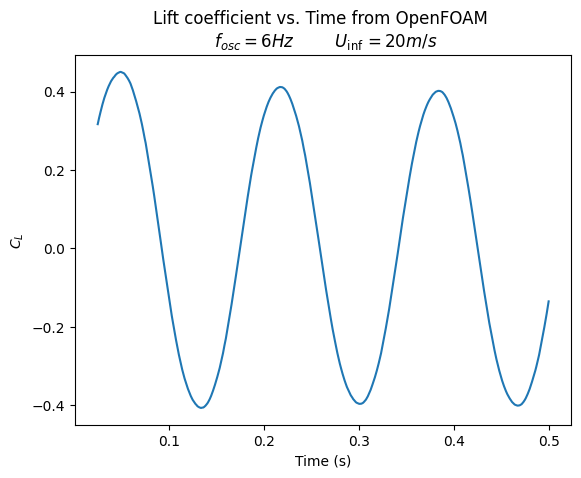

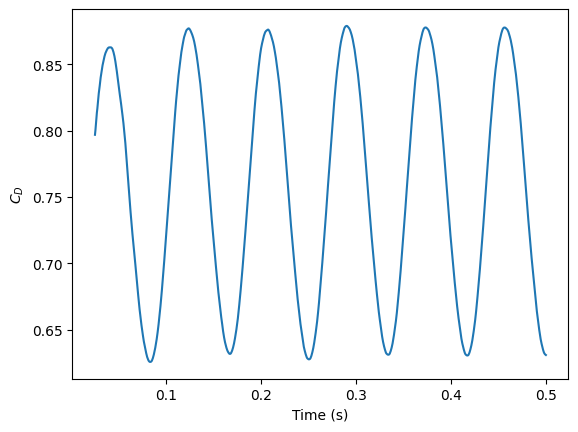

In [27]:
N_startup = 50

plt.figure()
plt.plot(time_bl[N_startup:],forces_bl[(N_startup+1):,1]/(.5*1*20**2*.61*.3))
plt.title('Lift coefficient vs. Time from OpenFOAM \n $f_{osc} = 6Hz$   \t$U_\inf = 20m/s$ ')
plt.xlabel('Time (s)')
plt.ylabel('$C_L$')

plt.savefig('CL-vs-Time.png')

plt.figure()
plt.plot(time_bl[N_startup:],forces_bl[(N_startup+1):,0]/(.5*1*20**2*.156*.3))
plt.xlabel('Time (s)')
plt.ylabel('$C_D$')

plt.savefig('CD-vs-Time.png')



<font size = "14"> $B^n_i(x) = \binom{n}{i} x^i \left(1-x\right)^{n-i}$ 
    

    
<font size = "14">$P(t) = $